In [3]:
# imports
%run SMC_ABC_recoded.py
%matplotlib inline
%run plot_settings.py
import DataAnalysisFunctions as daf

%px import numpy as np
%px import scipy as sp
%px import random
%px from scipy import stats
%px from ipyparallel import CompositeError

rc[:]['create_parameter_vector'] = create_parameter_vector
rc[:]['singleTranscript'] = singleTranscript

# load experimental data
column = 11
path_cre = '/home/stephan/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/Microscopy-data/ex2T16_cre_c6/'
path_cre = 'C:/Users/baumgast/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/Microscopy-data/ex2T16_cre_c6/'
path_5pM = path_cre + '5pM/'
Data5pM,Time5pM,Mock5pM,Time5pM = daf.ImportData(path_5pM,column)
Time5pM = Time5pM[:,0]

path_10pM = path_cre + '10pM/'
Data10pM,Time5pM,Mock10pM,Time10pM = daf.ImportData(path_10pM,column)
Time10pM = Time10pM[:,0]

path_20pM = path_cre + '20pM/'
Data20pM,Time20pM,Mock20pM,Time20pM = daf.ImportData(path_20pM,column)
Time20pM = Time20pM[:,0]

path_1000pM = path_cre + '1000pM/'
Data1000pM,Time1000pM,Mock1000pM,Time1000pM = daf.ImportData(path_1000pM,column)
Time1000pM = Time1000pM[:,0]

# load experimental data
rows = np.arange(10,260)
path_rep_data = 'H:/stephan/dat-files/'

path_0pM = path_rep_data+'0pM/'
Data0pM_2,Time0pM,Mock0pM_2,Time0pM = daf.ImportData(path_0pM,column)
Data0pM_2 = Data0pM_2[rows,:]
Mock0pM_2 = Mock0pM_2[rows,:]

path_5pM = path_rep_data+'5pM/'
Data5pM_2,Time5pM,Mock5pM_2,Time5pM = daf.ImportData(path_5pM,column)
Data5pM_2 = Data5pM_2[rows,:]
Mock5pM_2 = Mock5pM_2[rows,:]

path_7pM = path_rep_data+'7pM/'
Data7pM_2,Time7pM,Mock7pM_2,Time7pM = daf.ImportData(path_7pM,column)
Data7pM_2 = Data7pM_2[rows,:]
Mock7pM_2 = Mock7pM_2[rows,:]

path_10pM = path_rep_data+'10pM/'
Data10pM_2,Time10pM,Mock10pM_2,Time10pM = daf.ImportData(path_10pM,column)
Data10pM_2 = Data10pM_2[rows,:]
Mock10pM_2 = Mock10pM_2[rows,:]

path_14pM = path_rep_data+'14pM/'
Data14pM_2,Time14pM,Mock14pM_2,Time14pM = daf.ImportData(path_14pM,column)
Data14pM_2 = Data14pM_2[rows,:]
Mock14pM_2 = Mock14pM_2[rows,:]

path_20pM = path_rep_data+'20pM/'
Data20pM_2,Time20pM,Mock20pM_2,Time20pM = daf.ImportData(path_20pM,column)
Data20pM_2 = Data20pM_2[rows,:]
Mock20pM_2 = Mock20pM_2[rows,:]

path_100pM = path_rep_data+'100pM/'
Data100pM_2,Time100pM,Mock100pM_2,Time100pM = daf.ImportData(path_100pM,column)
Data100pM_2 = Data100pM_2[rows,:]
Mock100pM_2 = Mock100pM_2[rows,:]

path_1000pM = path_rep_data+'1000pM/'
Data1000pM_2,Time1000pM,Mock1000pM_2,Time1000pM = daf.ImportData(path_1000pM,column)
Data1000pM_2 = Data1000pM_2[rows,:]
Mock1000pM_2 = Mock1000pM_2[rows,:]
path = '/home/stephan/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/ABC/Fitting_Cre/'
path = 'C:/Users/baumgast/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/ABC/Fitting_Cre/1st_rep/'

# load fitting data
path = 'H:/stephan/2nd_rep/'
smc_0pM_115 = np.load(path+'0pM/smc_0pM_1000_115.npy')
smc_5pM_115 = np.load(path+'5pM/smc_5pM_1000_115.npy')
smc_7pM_115 = np.load(path+'7pM/smc_7pM_1000_115.npy')
smc_10pM_115 = np.load(path+'10pM/smc_10pM_1000_115.npy')
smc_14pM_115 = np.load(path+'14pM/smc_14pM_1000_115.npy')
smc_20pM_115 = np.load(path+'20pM/smc_20pM_1000_115.npy')
smc_100pM_115 = np.load(path+'100pM/smc_100pM_1000_115.npy')
smc_1000pM_115 = np.load(path+'1000pM/smc_1000pM_1000_115.npy')

In [8]:
# functions
names = ['5 pM','10 pM','20 pM','1000 pM']
names_2 = ['0 pM','5 pM','7 pM','10 pM','14 pM','20 pM','100 pM','1000 pM']
T = np.array([5,10,15,20,30,40,100,150,200,300,400,500,600,700,800,900,1000,1500,2000])
T_2 = np.array([1,5,10,15,20,25,30,35,40,45,50,60,70,80,100,120,150,200,250,300,350,400,450,500,600])
n_sims = [Data5pM.shape[1],Data10pM.shape[1],Data20pM.shape[1],Data1000pM.shape[1]]
n_sims_2 = [Data0pM_2.shape[1],Data5pM_2.shape[1],Data7pM_2.shape[1],Data10pM_2.shape[1],Data14pM_2.shape[1],Data20pM_2.shape[1],
          Data100pM_2.shape[1],Data1000pM_2.shape[1]]

def find_best_T_combinations_all(path,n_sims,model = np.array([5,1,1,5]),T = T):
    file_list = glob.glob(path+'*.npy')
    Particles = np.zeros((len(file_list),20,len(n_sims)))
    Total_dist = np.zeros(len(file_list))
    
    for ii,ff in enumerate(file_list):
        res = np.load(ff)
        particle,sims,pert,dists,total_dist = find_best_T_combinations(res,model,n_sims,T = T)
        Particles[ii] = particle
        Total_dist[ii] = total_dist
        
        if ii == 0:
            Sims = sims
            Perturb = pert
            Dists = dists
        else:
            for jj in np.arange(0,len(n_sims)):
                Sims[jj] = np.dstack((Sims[jj],sims[jj]))
                Perturb[jj] = np.dstack((Perturb[jj],pert[jj]))
                Dists[jj] = np.vstack((Dists[jj],dists[jj]))
    for ii in np.arange(0,len(n_sims)):
        Sims[ii] = Sims[ii][:,0:n_sims[ii],:]
        Perturb[ii] = Perturb[ii][0:n_sims[ii],:,:]

    return sort_particles_global(Particles,Sims,Perturb,Dists,Total_dist)

def find_best_T_combinations(res,model,n_sims,T):
    particle = np.zeros((20,len(n_sims)))
    for ii in np.arange(0,len(n_sims)):
        particle[1:5,ii] = model
    par = res[0]
    particle[5] = par[5]
    particle[8] = par[8]
    particle[9] = par[9]
    particle[12] = par[12]
    dist = res[4]

    part_index = np.argmin(dist,axis = 1)
    dist_min = dist.min(axis = 1)
    ind_sort = np.argsort(dist_min,axis = 1)
    
    dist_best = np.zeros(len(n_sims))
    dists = []
    sims = []
    perturbation = []
    for ii in np.arange(0,len(n_sims)):
        dist_best[ii] = dist_min[ii,ind_sort[ii,0]]
        
        dists.append(res[3][ind_sort[ii,0]][ii][part_index[ii,0],:])
        
        particle[10,ii] = T[ind_sort[ii,0]]
        
        sims.append(res[1][ind_sort[ii,0]][ii][:,:,part_index[ii,0]])
        
        perturbation.append(res[2][ind_sort[ii,0]])
        
    return particle,sims,perturbation,dists,np.sum(dist_best)

def filter_particles(smc_res,sel_model,tau_lim,km_lim,n_part = 2000, models = models):
    print 'selected model:',models[sel_model]
    
    tau_min,tau_max = tau_lim[0],tau_lim[1]
    km_min,km_max = km_lim[0],km_lim[1]
    
    sel_particles = []
    sel_dist = []
    sel_ind = []
    
    for smc in smc_res:
        smc[0] = smc[0][0:n_part,:,:]
        ind = np.where(smc[0][:,1,-1] == sel_model)[0]
        part = smc[0][ind,:,-1]
        ii = np.where((part[:,9] >= tau_min) & (part[:,9] <= tau_max))[0]
        ind = ind[ii]
        part = part[ii]
        part[:,8] = part[:,8]/part[:,9]
        ii = np.where((part[:,8] >= km_min) & (part[:,8] <= km_max))[0]
        ind = ind[ii]
        part = part[ii]
        smc[2] = smc[2][0:n_part,:]
        dist = smc[2][ind,:,-1]
        
        sel_particles.append(part)
        sel_ind.append(ind)
        sel_dist.append(dist)
    print '#selected particles', np.vstack(sel_particles).shape[0]
    return sel_particles,sel_ind,sel_dist

def titrate_T(part, data, mock,n_sim,n_particles,
              T = T, 
              tf = 750,alpha = alpha):
    scale,shape = fit_noise_model(mock)
    simulations = []
    distances = []
    ii = 0
    while ii < len(T):
        particles = np.repeat(part.reshape(1,20),n_particles,axis = 0)
        particles[:,10] = T[ii]
        
        sims = simulate_multiple_particles(particles,n_sim,tf)
        sims_noise = add_noise_log_normal(sims[0],alpha,scale,shape)
        simulations.append(sims_noise)
        
        dist = distance_all(data,sims_noise)
        distances.append(dist[:,5])
        #print 'T = ',T[ii],'finished'
        ii = ii + 1
    return simulations,distances

def titrate_T_multi(selected_particles,Data,Mock,n_particles,save,start,T = T,tf = 750):
    run = time.time()
    Scale = []
    Shape = []
    for mock in Mock:
        scale,shape = fit_noise_model(mock)
        Scale.append(scale)
        Shape.append(shape)
        
    N_sim = []
    for data in Data:
        N_sim.append(data.shape[1])
    n_sim = np.max(N_sim)
    
    res = np.zeros((len(Data),n_particles,len(T)))
    Res = []
    for kk,part in enumerate(selected_particles):
        Sims = []
        Dists = []
        Perturb = []
        for ii in np.arange(0,len(T)):
            particles = np.repeat(part.reshape(1,20),n_particles,axis = 0)
            particles[:,10] = T[ii]
            
            sim = simulate_multiple_particles(particles,n_sim,tf)
            Perturb.append(sim[1])
            
            Sim_noise = []
            Dist = []
            for jj,data in enumerate(Data):
                sim_noise = add_noise_log_normal(sim[0],alpha,Scale[jj],Shape[jj])
                Sim_noise.append(sim_noise)
                dist = distance_all(data,sim_noise[:,0:N_sim[jj],:])
                Dist.append(dist)
                res[jj,:,ii] = dist[:,5]
            Sims.append(Sim_noise)
            Dists.append(Dist)
        np.save(save+str(kk+start),[part,Sims,Perturb,Dists,res])
        Res.append(res)
        print 'Finished',kk+1,'/',len(selected_particles)
    print 'Duration:',np.round((time.time() - run)/60,2),'min'
    
    
    
def titrate_T_multiple_particles(selected_particles,data,mock,n_sim,n_particles,T = T):
    run = time.time()
    res = []
    for ii in np.arange(0,len(data)):
        Sims = []
        Dists = []
        for part in selected_particles:
            sims,dists = titrate_T(part,data[ii],mock[ii],n_sim[ii],n_particles)
            #Sims.append(sims)
            Dists.append(dists)
        res.append(Dists)
        print 'Finished:',ii+1,'/',len(data)
    print 'Duration:',np.round((time.time() - run)/60,2),'min'
    return res
            
    
    
def boxplots_distances_T_titration(res,dd,T = T):
    fig,ax = pl.subplots(1,1, figsize = (10,3))
    bp = ax.boxplot(res[1], patch_artist=True)
    nice_boxplots(bp)
    ax.plot([0,15],[0.5,0.5],'--',lw = line_wdth,color = 'dimgrey')
    ax.set_ylabel('Distance')
    ax.set_xlabel('Off time (min)')
    ax.set_xticklabels(T);
    ax.set_title(names[dd])
    ax.set_ylim(0,5);
    
def boxplots_T_titration_conc(res,T = T, label = names,save = [False]):
    matplotlib.rcParams.update({'font.size': 13, 'font.family': 'sans','axes.grid': True})
    fig = pl.figure(figsize = (1*fig_width,1.7*figheight_single))
    gs = gridspec.GridSpec(len(res),1)
    for ii,rr in enumerate(res):
        ax = fig.add_subplot(gs[ii])
        bp = ax.boxplot(rr,patch_artist=True)
        nice_boxplots(bp)
        ax.plot([0,20],[0.5,0.5],'--',lw = line_wdth, color = 'dimgrey')
        ax.set_ylabel('Distance')
        ax.set_ylim(0,6)
        ax.text(19.7,3,names[ii], color = 'dimgrey')
        if ii < len(res) - 1:
            ax.set_xticklabels([])
        else:
            ax.set_xticklabels(T)
            ax.set_xlabel('Off time (min)')
        #pl.tight_layout()
        if save[0] == True:
            pl.savefig(save[1]+save[2],dpi = save[3])
            
# functions
bursts = sp.linspace(1,50,10)
def filter_particles_burst(smc_res, sel_model,tau_lim,T_lim,models = models):
    print 'selected model:', models[sel_model]
    
    tau_min,tau_max = tau_lim[0],tau_lim[1]
    T_min,T_max = T_lim[0],T_lim[1]
    
    sel_particles = []
    
    for smc in smc_res:
        ind = np.where(smc[0][:,1,-1] == sel_model)[0]
        part = smc[0][ind,:,-1]
        ii = np.where((part[:,9] >= tau_min) & (part[:,9] <= tau_max))
        part = part[ii]
        ii = np.where((part[:,10] >= T_min) & (part[:,10] <= T_max))
        part = part[ii]
        
        sel_particles.append(part)
    print 'selected particles:',np.vstack(sel_particles).shape[0]
    return sel_particles

def titrate_burst_mutli(selected_particles,Data,Mock,n_particles,save,bursts,tf = 750):
    run = time.time()
    Scale = []
    Shape = []
    
    for mock in Mock:
        scale,shape = fit_noise_model(mock)
        Scale.append(scale)
        Shape.append(shape)
    
    N_sim = []
    for data in Data:
        N_sim.append(data.shape[1])
    n_sim = np.max(N_sim)
    
    res = np.zeros((len(Data),n_particles,len(bursts)))
    for kk,particle in enumerate(selected_particles):
        Sims = []
        Dists = []
        Perturb = []
        for ii,bb in enumerate(bursts):
            particles = np.repeat(particle.reshape(1,20),n_particles,axis=0)
            particles[:,8] = bb

            sims = simulate_multiple_particles(particles,n_sim,tf)
            Perturb.append(sims[1])
            
            Sim_noise = []
            Dist = []
            for jj, data in enumerate(Data):
                sim_noise = add_noise_log_normal(sims[0],alpha,Scale[jj],Shape[jj])
                Sim_noise.append(sim_noise)
                dist = distance_all(data,sim_noise[:,0:N_sim[jj],:])
                Dist.append(dist)
                res[jj,:,ii] = dist[:,5]
            Sims.append(Sim_noise)
            Dists.append(Dist)
        np.save(save+str(kk),[particle,Sims,Perturb,Dists,res])
        print 'Finished',kk+1,'/',len(selected_particles)
    print 'Duration:',np.round((time.time() - run)/60,2),'min'
    
# functions
def find_best_burst_combinations(res,model,n_sims,bursts):
    particle = np.zeros((20,len(n_sims)))
    for ii in np.arange(0,len(n_sims)):
        particle[1:5,ii] = model
    par = res[0]
    particle[5] = par[5]
    particle[9] = par[9]
    particle[10] = par[10]
    dist = res[4]
    
    part_index = np.argmin(dist,axis = 1)
    dist_min = dist.min(axis = 1)
    ind_sort = np.argsort(dist_min,axis = 1)
    
    dist_best = np.zeros(len(n_sims))
    dists = [] 
    sims = []
    perturbation = []
    for ii in np.arange(0,len(n_sims)):
        dist_best[ii] = dist_min[ii,ind_sort[ii,0]]
        dists.append(res[3][ind_sort[ii,0]][ii][part_index[ii,0],:])
        
        particle[8,ii] = bursts[ind_sort[ii,0]]
        
        sims.append(res[1][ind_sort[ii,0]][ii][:,:,part_index[ii,0]])
        
        perturbation.append(res[2][ind_sort[ii,0]])
        
    return particle,sims,perturbation,dists,np.sum(dist_best)

def find_best_burst_combinations_all(path,n_sims,model = np.array([5,1,1,5]),bursts = bursts):
    file_list = glob.glob(path+'*.npy')
    Particles = np.zeros((len(file_list),20,len(n_sims)))
    Total_dist = np.zeros(len(file_list))
    
    for ii,ff in enumerate(file_list):
        res = np.load(ff)
        particle,sims,pert,dists,total_dist = find_best_burst_combinations(res,model,n_sims,bursts)
        Particles[ii] = particle
        Total_dist[ii] = total_dist
        
        if ii == 0:
            Sims = sims
            Perturb = pert
            Dists = dists
        else:
            for jj in np.arange(0,len(n_sims)):
                Sims[jj] = np.dstack((Sims[jj],sims[jj]))
                Perturb[jj] = np.dstack((Perturb[jj],pert[jj]))
                Dists[jj] = np.vstack((Dists[jj],dists[jj]))
    for ii in np.arange(0,len(n_sims)):
        Sims[ii] = Sims[ii][:,0:n_sims[ii],:]
        Perturb[ii] = Perturb[ii][0:n_sims[ii],:,:]
    Particles[:,0,:] = 1./Particles.shape[0]
    return sort_particles_global(Particles,Sims,Perturb,Dists,Total_dist)

# Filter individual fitting results for overlapping posteriors

In [4]:
# load fitting results, first replicate
path = '/home/stephan/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/ABC/Fitting_Cre/'
path = 'C:/Users/baumgast/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/ABC/Fitting_Cre/1st_rep/'
smc_5pM = np.load(path+'5pM/smc_5pM_2000_corrected.npy')
smc_10pM = np.load(path+'10pM/smc_10pM_2000_corrected.npy')
smc_20pM = np.load(path+'20pM/smc_20pM_2000_corrected.npy')
smc_1000pM = np.load(path+'1000pM/smc_1000pM_2nd_1_plus_2.npy')

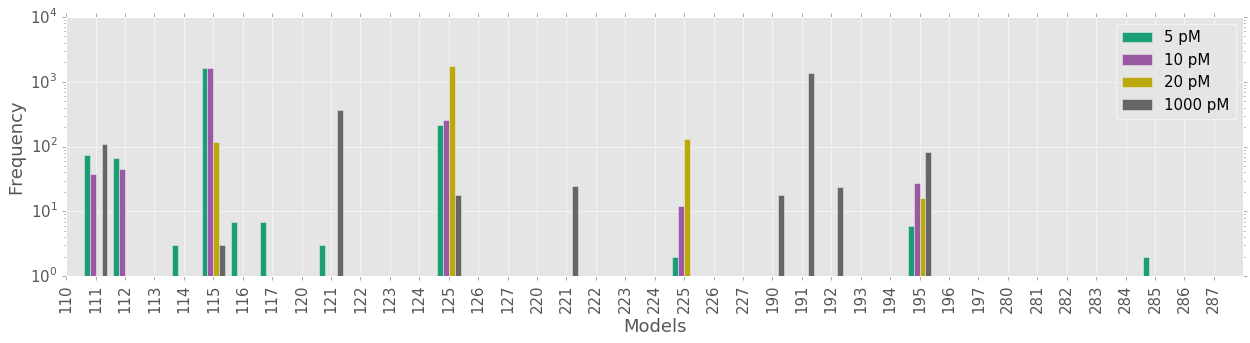

In [4]:
# barplots
m_5 = smc_5pM[0][:,1,-1]
m_10 = smc_10pM[0][:,1,-1]
m_20 = smc_20pM[0][:,1,-1]
m_1000 = smc_1000pM[0][:,1,-1]
c_5 = np.bincount(np.array(m_5,dtype = int),minlength=40)
c_10 = np.bincount(np.array(m_10,dtype = int),minlength=40)
c_20 = np.bincount(np.array(m_20,dtype = int),minlength=40)
c_1000 = np.bincount(np.array(m_1000,dtype = int),minlength=40)
fig,ax = pl.subplots(1,1, figsize = (1.6*fig_width,1*figheight_single))
labels = ['110','111','112','113','114','115','116','117',
       '120','121','122','123','124','125','126','127',
       '220','221','222','223','224','225','226','227',
       '190','191','192','193','194','195','196','197',
       '280','281','282','283','284','285','286','287']
width = 0.2
ind = np.arange(0,40)
ax.bar(ind-2*width,c_5,width, color = colors_conditions[0], label = '5 pM')
ax.bar(ind-width,c_10,width, color = colors_conditions[1], label = '10 pM')
ax.bar(ind,c_20,width, color = colors_conditions[2], label = '20 pM')
ax.bar(ind+width,c_1000,width, color = colors_conditions[3], label = '1000 pM')
ax.legend(loc = 'best', fontsize = fontsize_legend)
ax.set_yscale('log')
ax.set_xticks(ind);
ax.set_xlim(0,40)
ax.set_xticklabels(labels, rotation = 90);
ax.set_xlabel('Models')
ax.set_ylabel('Frequency')
pl.tight_layout()
#pl.savefig(plot_path+'model_frequencies.jpg',dpi = dpi)

In [5]:
# load fits
path =   'H:/stephan/ABC/Fitting_Cre/2nd_rep/'
smc_0pM = np.load(path+'0pM/smc_0pM_2000_lut.npy')
smc_5pM = np.load(path+'5pM/smc_5pM_2000_lut.npy')
smc_7pM = np.load(path+'7pM/smc_7pM_2000_lut.npy')
smc_10pM = np.load(path+'10pM/smc_10pM_2000_lut.npy')
smc_14pM = np.load(path+'14pM/smc_14pM_2000_lut.npy')
smc_20pM = np.load(path+'20pM/smc_20pM_2000_lut.npy')
smc_100pM = np.load(path+'100pM/smc_100pM_2000_lut.npy')
smc_1000pM = np.load(path+'1000pM/smc_1000pM_2000_lut.npy')

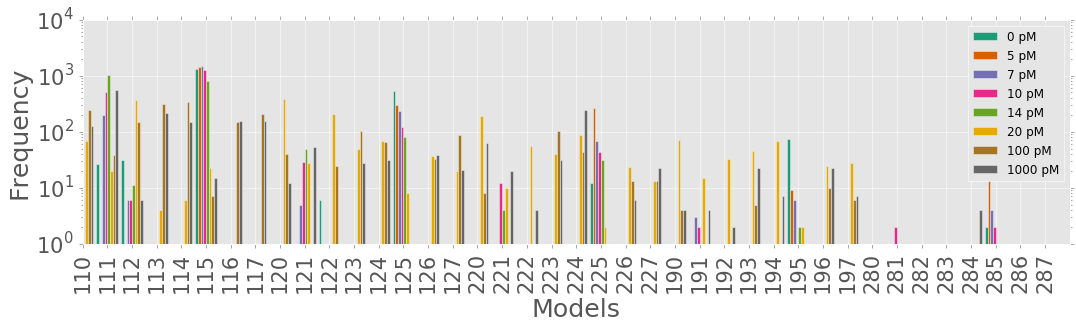

In [12]:
# barplots
m_0 = smc_0pM[0][:,1,-1]
m_5 = smc_5pM[0][:,1,-1]
m_7 = smc_7pM[0][:,1,-1]
m_10 = smc_10pM[0][:,1,-1]
m_14 = smc_14pM[0][:,1,-1]
m_20 = smc_20pM[0][:,1,-1]
m_100 = smc_100pM[0][:,1,-1]
m_1000 = smc_1000pM[0][:,1,-1]
c_0 = np.bincount(np.array(m_0,dtype = int),minlength=40)
c_5 = np.bincount(np.array(m_5,dtype = int),minlength=40)
c_7 = np.bincount(np.array(m_7,dtype = int),minlength=40)
c_10 = np.bincount(np.array(m_10,dtype = int),minlength=40)
c_14 = np.bincount(np.array(m_14,dtype = int),minlength=40)
c_20 = np.bincount(np.array(m_20,dtype = int),minlength=40)
c_100 = np.bincount(np.array(m_100,dtype = int),minlength=40)
c_1000 = np.bincount(np.array(m_1000,dtype = int),minlength=40)

matplotlib.rcParams.update({'font.size': 21, 'font.family': 'sans'})
colors_conditions = colormap_conditions(sp.linspace(0,1,8))
fig,ax = pl.subplots(1,1, figsize = (1.4*fig_width,1*figheight_single))
labels = ['110','111','112','113','114','115','116','117',
       '120','121','122','123','124','125','126','127',
       '220','221','222','223','224','225','226','227',
       '190','191','192','193','194','195','196','197',
       '280','281','282','283','284','285','286','287']
width = 0.11
ind = np.arange(0,40)
ax.bar(ind-4*width,c_0,width, color = colors_conditions[0], label = '0 pM')
ax.bar(ind-3*width,c_5,width, color = colors_conditions[1], label = '5 pM')
ax.bar(ind-2*width,c_7,width, color = colors_conditions[2], label = '7 pM')
ax.bar(ind-1*width,c_10,width, color = colors_conditions[3], label = '10 pM')
ax.bar(ind-0*width,c_14,width, color = colors_conditions[4], label = '14 pM')
ax.bar(ind+1*width,c_20,width, color = colors_conditions[5], label = '20 pM')
ax.bar(ind+2*width,c_100,width, color = colors_conditions[6], label = '100 pM')
ax.bar(ind+3*width,c_1000,width, color = colors_conditions[7], label = '1000 pM')

ax.legend(loc = 'best', fontsize = 12)
ax.set_yscale('log')
ax.set_xticks(ind);
ax.set_xlim(0,40)
ax.set_xticklabels(labels, rotation = 90);
ax.set_xlabel('Models')
ax.set_ylabel('Frequency')
pl.tight_layout()

# Global fitting

## Fit 115 model to 1000 pM data set

In [23]:
alpha = 32.8
n_particles = 2000
stop = 0.2
iterations = 8
threshold = 1.
path = '/home/stephan/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/ABC/Fitting_Cre/1st_rep/'
path = 'C:/Users/baumgast/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/ABC/Fitting_Cre/1st_rep/'
cand_path = '/home/stephan/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/ABC/smc_abc_validation/candidates/'
cand_path = '//uni-mainz.de/dfs/profiles/settings/baumgast/Desktop/candidates/'

In [24]:
start_population = np.load(path+'1000pM/start_1000pM_115.npy')

In [25]:
save = [True,path+'1000pM/','smc_1000pM_115_']
smc = smc_abc(Data1000pM,Mock1000pM,start_population,iterations,stop,threshold=threshold,save = save)
np.save(path+'1000pM/smc_1000pM_1000_115.npy',smc)

# particles better than stop: 0
Min start distance: 1.026
Mean start distance: 1.211
Max start distance: 1.273
STD of start distance: 0.051
Mean of burst, tau and T: [ 13.865   0.973  14.638]
STD of burst, tau and T: [ 4.393  0.189  4.809]
Iteration: 1
Threshold distance 1.173
Try: 0 First particles accepted: 20
Try: 1 More particles accepted: 45
Try: 2 More particles accepted: 66
Try: 3 More particles accepted: 86
Try: 4 More particles accepted: 97
Try: 5 More particles accepted: 114
Try: 6 More particles accepted: 128
Try: 7 More particles accepted: 151
Try: 8 More particles accepted: 163
Try: 9 More particles accepted: 183
Try: 10 More particles accepted: 207
Slow creation of new particles, reduced number of tries to: 15
Try: 11 More particles accepted: 224
Try: 12 More particles accepted: 235
Try: 13 More particles accepted: 250
Try: 14 More particles accepted: 267
Not enough particles accepted: 267
# Created particles: 10031
# particles better than stop: 0
Min distance of current 

## Fit 125 model to 1000 pM data set

In [26]:
# select particles with 125 model and create new particles to fill up the population
ind = np.where(smc_1000pM[0][:,1,-1] == 13)[0]
selected_particles = smc_1000pM[0][ind,:,-1]
max_dist = smc_1000pM[2][-1,5,-1]
n_new = 1000 - ind.shape[0]
threshold=1.
new_particles = create_new_particles_below_max_dist(Data1000pM,Mock1000pM,selected_particles,
                                                    max_dist,n_new,alpha,threshold)

part = np.vstack((selected_particles,new_particles[0]))
sim = np.dstack((smc_1000pM[1][:,:,ind],new_particles[1]))
dist = np.vstack((smc_1000pM[2][ind,:,-1],new_particles[2]))
pert = np.dstack((smc_1000pM[3][:,:,ind],new_particles[3]))

ind_sort = np.argsort(dist[:,5])
part = part[ind_sort]
sim = sim[:,:,ind_sort]
dist = dist[ind_sort,:]
pert = pert[:,:,ind_sort]

np.save(path+'1000pM/start_1000pM_125.npy',[part,sim,dist,pert])

Try: 0 First particles accepted: 29
Try: 1 More particles accepted: 57
Try: 2 More particles accepted: 90
Try: 3 More particles accepted: 113
Try: 4 More particles accepted: 130
Try: 5 More particles accepted: 151
Try: 6 More particles accepted: 183
Try: 7 More particles accepted: 207
Try: 8 More particles accepted: 227
Try: 9 More particles accepted: 249
Try: 10 More particles accepted: 267
Slow creation of new particles, reduced number of tries to: 15
Try: 11 More particles accepted: 290
Try: 12 More particles accepted: 312
Try: 13 More particles accepted: 333
Try: 14 More particles accepted: 359
Not enough particles accepted: 359
# Created particles: 12092


In [27]:
start_population = np.load(path+'1000pM/start_1000pM_125.npy')
save = [True,path+'1000pM/','smc_1000pM_125_']
smc = smc_abc(Data1000pM,Mock1000pM,start_population,iterations,stop,threshold=threshold,save = save)
np.save(path+'1000pM/smc_1000pM_125_.npy',smc)

# particles better than stop: 0
Min start distance: 0.928
Mean start distance: 1.16
Max start distance: 1.226
STD of start distance: 0.053
Mean of burst, tau and T: [ 11.799   0.774  12.859]
STD of burst, tau and T: [ 3.786  0.153  4.234]
Iteration: 1
Threshold distance 1.117
Try: 0 First particles accepted: 23
Try: 1 More particles accepted: 45
Try: 2 More particles accepted: 66
Try: 3 More particles accepted: 90
Try: 4 More particles accepted: 120
Try: 5 More particles accepted: 143
Try: 6 More particles accepted: 156
Try: 7 More particles accepted: 178
Try: 8 More particles accepted: 198
Try: 9 More particles accepted: 214
Try: 10 More particles accepted: 231
Slow creation of new particles, reduced number of tries to: 15
Try: 11 More particles accepted: 246
Try: 12 More particles accepted: 257
Try: 13 More particles accepted: 272
Try: 14 More particles accepted: 297
Not enough particles accepted: 297
# Created particles: 9761
# particles better than stop: 0
Min distance of current p

AttributeError: 'NoneType' object has no attribute 'append'

## Titrate the promoter off time for individual particles to define a global start population

In [129]:
# data sets
Data = [Data5pM,Data10pM,Data20pM,Data1000pM]
Mock = [Mock5pM,Mock10pM,Mock20pM,Mock1000pM]

Data_2 = [Data0pM_2,Data5pM_2,Data7pM_2,Data10pM_2,Data14pM_2,Data20pM_2,Data100pM_2,Data1000pM_2]
Mock_2 = [Mock0pM_2,Mock5pM_2,Mock7pM_2,Mock10pM_2,Mock14pM_2,Mock20pM_2,Mock100pM_2,Mock1000pM_2]

### play with off time titration

In [6]:
# load simulations
res_5pM = np.load(path+'global/res_5pM.npy')
res_10pM = np.load(path+'global/res_10pM.npy')
res_20pM = np.load(path+'global/res_20pM.npy')
res_1000pM = np.load(path+'global/res_1000pM.npy')

In [78]:
# simulate for 5 pM
dd = 0
run = time.time()
res_5pM = titrate_T(part,Data[dd],Mock[dd],n_sim[dd],n_particles)
print 'Duration:', np.round((time.time() - run)/60,2),'min'

T =  5 finished
T =  10 finished
T =  15 finished
T =  20 finished
T =  30 finished
T =  40 finished
T =  70 finished
T =  100 finished
T =  150 finished
T =  200 finished
T =  300 finished
T =  500 finished
T =  600 finished
T =  700 finished
T =  800 finished
T =  900 finished
T =  1000 finished
T =  1500 finished
T =  2000 finished
Duration: 6.37 min


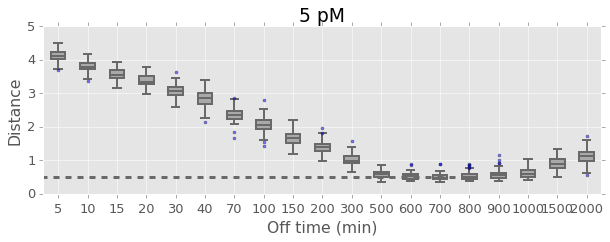

In [79]:
# create boxplots
boxplots_distances_T_titration(res_5pM,dd=0)

In [80]:
# simulate for 10 pM
dd = 1
run = time.time()
res_10pM = titrate_T(part,Data[dd],Mock[dd],n_sim[dd],n_particles)
print 'Duration:', np.round((time.time() - run)/60,2),'min'

T =  5 finished
T =  10 finished
T =  15 finished
T =  20 finished
T =  30 finished
T =  40 finished
T =  70 finished
T =  100 finished
T =  150 finished
T =  200 finished
T =  300 finished
T =  500 finished
T =  600 finished
T =  700 finished
T =  800 finished
T =  900 finished
T =  1000 finished
T =  1500 finished
T =  2000 finished
Duration: 5.77 min


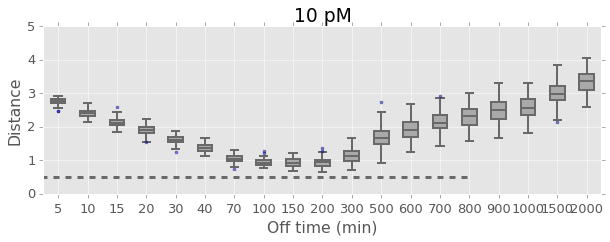

In [81]:
# create boxplots
boxplots_distances_T_titration(res_10pM,dd = 1)

In [82]:
# simulate for 20 pM
dd = 2
run = time.time()
res_20pM = titrate_T(part,Data[dd],Mock[dd],n_sim[dd],n_particles)
print 'Duration:', np.round((time.time() - run)/60,2),'min'

T =  5 finished
T =  10 finished
T =  15 finished
T =  20 finished
T =  30 finished
T =  40 finished
T =  70 finished
T =  100 finished
T =  150 finished
T =  200 finished
T =  300 finished
T =  500 finished
T =  600 finished
T =  700 finished
T =  800 finished
T =  900 finished
T =  1000 finished
T =  1500 finished
T =  2000 finished
Duration: 7.82 min


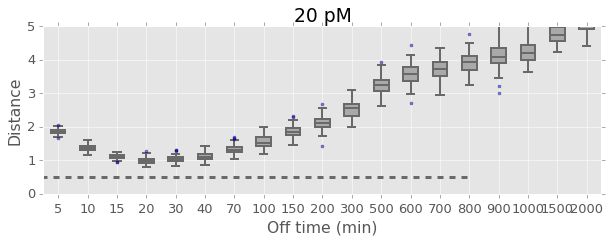

In [83]:
# create boxplots
boxplots_distances_T_titration(res_20pM,dd = 2)

In [84]:
# simulate for 1000 pM
dd = 3
run = time.time()
res_1000pM = titrate_T(part,Data[dd],Mock[dd],n_sim[dd],n_particles)
print 'Duration:', np.round((time.time()-run)/60,2),'min'

T =  5 finished
T =  10 finished
T =  15 finished
T =  20 finished
T =  30 finished
T =  40 finished
T =  70 finished
T =  100 finished
T =  150 finished
T =  200 finished
T =  300 finished
T =  500 finished
T =  600 finished
T =  700 finished
T =  800 finished
T =  900 finished
T =  1000 finished
T =  1500 finished
T =  2000 finished
Duration: 7.4 min


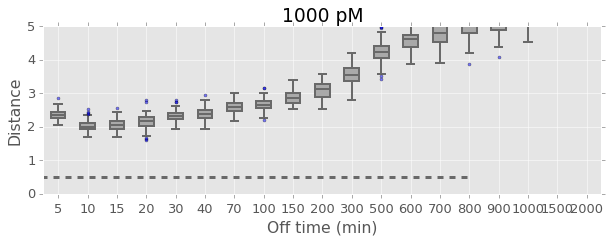

In [85]:
# create boxplots
boxplots_distances_T_titration(res_1000pM,dd = 3)

In [118]:
# save simulations to disk
np.save(path+'global/res_5pM.npy',res_5pM)
np.save(path+'global/res_10pM.npy',res_10pM)
np.save(path+'global/res_20pM.npy',res_20pM)
np.save(path+'global/res_1000pM.npy',res_1000pM)

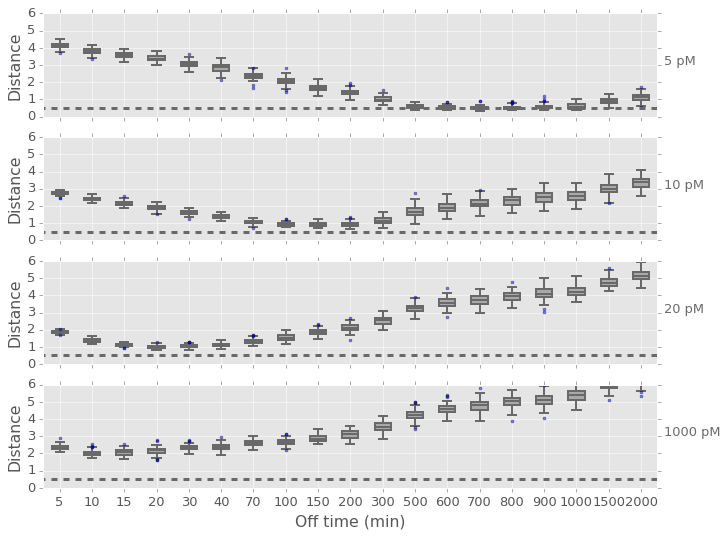

In [8]:
res = [res_5pM[1],res_10pM[1],res_20pM[1],res_1000pM[1]]
boxplots_T_titration_conc(res,save = [False,plot_path,'off_time_titration.jpg',dpi])

In [12]:
n_part = 15
res = titrate_T_multiple_particles(sel_par[0:3],Data,Mock,n_sim,n_part)
# np.save(path+'global/sim_T_titration_20.npy',res)

Finished: 1 / 4
Finished: 2 / 4
Finished: 3 / 4
Finished: 4 / 4
Duration: 33.16 min


## Create a start population

Use the filtered particles that showed common parameter values for $\tau$ and $k_{m}$. For each particle titrate the promoter off time between 5 and 2000 minutes. Find the best combination of common parameters and off time to create a initial population. The total number of selected particles is 477 yielding 477 candidates. To fill up to 1000 particles use the particle creation function used during SMC ABC. Set the maximal distance to the worst of the initial particles.

### 115 global start population

In [53]:
# off time titration
smc_1000pM_115 = np.load(path+'1000pM/smc_1000pM_1000_115.npy')

ind = 415
smc_1000pM_115 = [smc_1000pM_115[0][0:ind],smc_1000pM_115[1][:,:,0:ind],smc_1000pM_115[2][0:ind],
                 smc_1000pM_115[3][:,:,0:ind]]

smc_res = [smc_5pM,smc_10pM,smc_20pM,smc_1000pM_115]
sel_model = 5
tau_lim = [0.5,1.5]
km_lim = [2,40]
selected_particles_115,sel_ind_115,sel_dist_115 = filter_particles(smc_res,sel_model,tau_lim,km_lim)

selected model: [1, 1, 5]
#selected particles 1000


In [61]:
n_particles = 4
start = 0
save =  'H:/stephan/global_candidates/115/'
titrate_T_multi(np.vstack(selected_particles_115),Data,Mock,n_particles,save,start)

Finished 1 / 1000
Finished 2 / 1000
Finished 3 / 1000
Finished 4 / 1000
Finished 5 / 1000
Finished 6 / 1000
Finished 7 / 1000
Finished 8 / 1000
Finished 9 / 1000
Finished 10 / 1000
Finished 11 / 1000
Finished 12 / 1000
Finished 13 / 1000
Finished 14 / 1000
Finished 15 / 1000
Finished 16 / 1000
Finished 17 / 1000
Finished 18 / 1000
Finished 19 / 1000
Finished 20 / 1000
Finished 21 / 1000
Finished 22 / 1000
Finished 23 / 1000
Finished 24 / 1000
Finished 25 / 1000
Finished 26 / 1000
Finished 27 / 1000
Finished 28 / 1000
Finished 29 / 1000
Finished 30 / 1000
Finished 31 / 1000
Finished 32 / 1000
Finished 33 / 1000
Finished 34 / 1000
Finished 35 / 1000
Finished 36 / 1000
Finished 37 / 1000
Finished 38 / 1000
Finished 39 / 1000
Finished 40 / 1000
Finished 41 / 1000
Finished 42 / 1000
Finished 43 / 1000
Finished 44 / 1000
Finished 45 / 1000
Finished 46 / 1000
Finished 47 / 1000
Finished 48 / 1000
Finished 49 / 1000
Finished 50 / 1000
Finished 51 / 1000
Finished 52 / 1000
Finished 53 / 1000
Fi

In [74]:
# best candidate particles
Particles,Sims,Perturb,Dists,Total_dist = find_best_T_combinations_all(save,n_sims)
start_population = [Particles,Sims,Perturb,Dists,Total_dist]
np.save(path+'global/start_global_115.npy',start_population)

In [ ]:
# bad particles to fill up the population
n_particles = 1000
n_bad = n_particles - len(Total_dist)
Part_bad = np.zeros((n_bad,20,4))
Sim_bad = [np.zeros((250,n_sim[0],n_bad)),np.zeros((250,n_sim[1],n_bad)),
           np.zeros((250,n_sim[2],n_bad)),np.zeros((250,n_sim[3],n_bad))]
Pert_bad = [np.zeros((n_sim[0],8,n_bad)),np.zeros((n_sim[1],8,n_bad)),
           np.zeros((n_sim[2],8,n_bad)),np.zeros((n_sim[3],8,n_bad))]
Dists_bad = [np.zeros((n_bad,6)),np.zeros((n_bad,6)),np.zeros((n_bad,6)),np.zeros((n_bad,6))]

Total_dist_bad = np.linspace(7,14,n_bad)

#start_population
start_population = [np.vstack((Particles,Part_bad)),stack_simulations(Sims,Sim_bad),
                    stack_simulations(Perturb,Pert_bad),stack_distances(Dists,Dists_bad),
                    np.hstack((Total_dist,Total_dist_bad))]
np.save(path+'global/start_global_115.npy',start_population)

### 125 global start population

In [106]:
# off time titration
smc_1000pM_125 = np.load(path+'1000pM/smc_1000pM_1000_125.npy')

smc_res = [smc_5pM,smc_10pM,smc_20pM,smc_1000pM_125]
sel_model = 13
tau_lim = [0.5,1.5]
km_lim = [2,40]
selected_particles_125,sel_ind_125,sel_dist_125 = filter_particles(smc_res,sel_model,tau_lim,km_lim)

ui_thresh = 0.8
selected_particles_125 = np.vstack(selected_particles_125)
ind = np.where(selected_particles_125[:,12] >= ui_thresh)[0]
selected_particles_125 = selected_particles_125[ind,:]
print selected_particles_125.shape

selected model: [1, 2, 5]
#selected particles 1965
(305L, 20L)


In [107]:
n_particles = 4
start = 0
save =  'H:/stephan/global_candidates/125/'
titrate_T_multi(selected_particles_125,Data,Mock,n_particles,save,start)

Finished 1 / 305
Finished 2 / 305
Finished 3 / 305
Finished 4 / 305
Finished 5 / 305
Finished 6 / 305
Finished 7 / 305
Finished 8 / 305
Finished 9 / 305
Finished 10 / 305
Finished 11 / 305
Finished 12 / 305
Finished 13 / 305
Finished 14 / 305
Finished 15 / 305
Finished 16 / 305
Finished 17 / 305
Finished 18 / 305
Finished 19 / 305
Finished 20 / 305
Finished 21 / 305
Finished 22 / 305
Finished 23 / 305
Finished 24 / 305
Finished 25 / 305
Finished 26 / 305
Finished 27 / 305
Finished 28 / 305
Finished 29 / 305
Finished 30 / 305
Finished 31 / 305
Finished 32 / 305
Finished 33 / 305
Finished 34 / 305
Finished 35 / 305
Finished 36 / 305
Finished 37 / 305
Finished 38 / 305
Finished 39 / 305
Finished 40 / 305
Finished 41 / 305
Finished 42 / 305
Finished 43 / 305
Finished 44 / 305
Finished 45 / 305
Finished 46 / 305
Finished 47 / 305
Finished 48 / 305
Finished 49 / 305
Finished 50 / 305
Finished 51 / 305
Finished 52 / 305
Finished 53 / 305
Finished 54 / 305
Finished 55 / 305
Finished 56 / 305
F

In [160]:
# best candidate particles
Particles,Sims,Perturb,Dists,Total_dist = find_best_T_combinations_all(save,n_sims,model=[13,1,2,5])

# bad particles to fill up the population
n_particles = 1000
n_bad = n_particles - len(Total_dist)
Part_bad = np.zeros((n_bad,20,4))
Sim_bad = [np.zeros((250,n_sims[0],n_bad)),np.zeros((250,n_sims[1],n_bad)),
           np.zeros((250,n_sims[2],n_bad)),np.zeros((250,n_sims[3],n_bad))]
Pert_bad = [np.zeros((n_sims[0],8,n_bad)),np.zeros((n_sims[1],8,n_bad)),
           np.zeros((n_sims[2],8,n_bad)),np.zeros((n_sims[3],8,n_bad))]
Dists_bad = [np.zeros((n_bad,6)),np.zeros((n_bad,6)),np.zeros((n_bad,6)),np.zeros((n_bad,6))]

Total_dist_bad = np.linspace(7,14,n_bad)

#start_population
start_population = [np.vstack((Particles,Part_bad)),stack_simulations(Sims,Sim_bad),
                    stack_simulations(Perturb,Pert_bad),stack_distances(Dists,Dists_bad),
                    np.hstack((Total_dist,Total_dist_bad))]
np.save(path+'global/start_global_125.npy',start_population)

### 2nd biological replicate, 115 start population, T as local parameter

In [28]:
path_2nd = 'C:/Users/baumgast/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/ABC/Fitting_Cre/2nd_rep/'

In [19]:
smc_res = [smc_0pM,smc_5pM,smc_7pM,smc_10pM,smc_14pM,smc_20pM,smc_100pM,smc_1000pM]
sel_model = 5
tau_lim = [0.5,2]
km_lim = [2,30]
selected_particles_115,sel_ind_115,sel_dist_115 = filter_particles(smc_res,sel_model,tau_lim,km_lim)

ind = 194
sel_part = [selected_particles_115[0][0:ind-1],selected_particles_115[1][0:ind],selected_particles_115[2][0:ind],
            selected_particles_115[3][0:ind],selected_particles_115[4][0:ind],selected_particles_115[5],
            selected_particles_115[6],selected_particles_115[7]]
np.vstack(sel_part).shape

selected model: [1, 1, 5]
#selected particles 4207


(1000L, 20L)

In [36]:
n_particles = 4
start = 0
save =  'H:/stephan/global_candidates/115/'
titrate_T_multi(np.vstack(sel_part),Data_2,Mock_2,n_particles,save,start,T = T_2)

<string>:247: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
<string>:248: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
<string>:250: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
<string>:259: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
<string>:263: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
<string>:281: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
<string>:288: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Finished 1 / 1000
Finished 2 / 1000
Finished 3 / 1000
Finished 4 / 1000
Finished 5 / 1000
Finished 6 / 1000
Finished 7 / 1000
Finished 8 / 1000
Finished 9 / 1000
Finished 10 / 1000
Finished 11 / 1000
Finished 12 / 1000
Finished 13 / 1000
Finished 14 / 1000
Finished 15 / 1000
Finished 16 / 1000
Finished 17 / 1000
Finished 18 / 1000
Finished 19 / 1000
Finished 20 / 1000
Finished 21 / 1000
Finished 22 / 1000
Finished 23 / 1000
Finished 24 / 1000
Finished 25 / 1000
Finished 26 / 1000
Finished 27 / 1000
Finished 28 / 1000
Finished 29 / 1000
Finished 30 / 1000
Finished 31 / 1000
Finished 32 / 1000
Finished 33 / 1000
Finished 34 / 1000
Finished 35 / 1000
Finished 36 / 1000
Finished 37 / 1000
Finished 38 / 1000
Finished 39 / 1000
Finished 40 / 1000
Finished 41 / 1000
Finished 42 / 1000
Finished 43 / 1000
Finished 44 / 1000
Finished 45 / 1000
Finished 46 / 1000
Finished 47 / 1000
Finished 48 / 1000
Finished 49 / 1000
Finished 50 / 1000
Finished 51 / 1000
Finished 52 / 1000
Finished 53 / 1000
Fi

In [ ]:
# best candidate particles
Particles,Sims,Perturb,Dists,Total_dist = find_best_T_combinations_all(save,n_sims_2,T = T_2)
Particles[:,0,:] = 1./Particles.shape[0]
start_population = [Particles,Sims,Perturb,Dists,Total_dist]

In [55]:
np.save(path_2nd+'global/start_global_115_optimal_start_T.npy',start_population)

### 2nd biological replicate 115 start population, burst as local parameter

In [6]:
# burst functions
def filter_particles_burst(smc_res,sel_model,tau_lim,T_lim,n_part = 2000, models = models):
    print 'selected model:',models[sel_model]
    
    tau_min,tau_max = tau_lim[0],tau_lim[1]
    T_min,T_max = T_lim[0],T_lim[1]
    
    sel_particles = []
    sel_dist = []
    sel_ind = []
    
    for smc in smc_res:
        smc[0] = smc[0][0:n_part,:,:]
        ind = np.where(smc[0][:,1,-1] == sel_model)[0]
        part = smc[0][ind,:,-1]
        ii = np.where((part[:,9] >= tau_min) & (part[:,9] <= tau_max))[0]
        ind = ind[ii]
        part = part[ii]
        ii = np.where((part[:,10] >= T_min) & (part[:,10] <= T_max))[0]
        ind = ind[ii]
        part = part[ii]
        smc[2] = smc[2][0:n_part,:]
        dist = smc[2][ind,:,-1]
        
        sel_particles.append(part)
        sel_ind.append(ind)
        sel_dist.append(dist)
    print '#selected particles', np.vstack(sel_particles).shape[0]
    return sel_particles,sel_ind,sel_dist

burst = [1,4,7,10,13,16,19,21,24,27,30,35,40]
def titrate_burst_multi(selected_particles,Data,Mock,n_particles,save,start,burst = burst, tf = 750):
    run = time.time()
    Scale = []
    Shape = []
    for mock in Mock:
        scale,shape = fit_noise_model(mock)
        Scale.append(scale)
        Shape.append(shape)
        
    N_sim = []
    for data in Data:
        N_sim.append(data.shape[1])
    n_sim = np.max(N_sim)
    
    res = np.zeros((len(Data),n_particles,len(burst)))
    Res = []
    for kk,part in enumerate(selected_particles):
        Sims = []
        Dists = []
        Perturb = []
        for ii in np.arange(0,len(burst)):
            particles = np.repeat(part.reshape(1,20),n_particles,axis = 0)
            particles[:,8] = burst[ii]
            
            sim = simulate_multiple_particles(particles,n_sim,tf)
            Perturb.append(sim[1])
            
            Sim_noise = []
            Dist = []
            for jj,data in enumerate(Data):
                sim_noise = add_noise_log_normal(sim[0],alpha,Scale[jj],Shape[jj])
                Sim_noise.append(sim_noise)
                dist = distance_all(data,sim_noise[:,0:N_sim[jj],:])
                Dist.append(dist)
                res[jj,:,ii] = dist[:,5]
            Sims.append(Sim_noise)
            Dists.append(Dist)
        np.save(save+str(kk+start),[part,Sims,Perturb,Dists,res])
        Res.append(res)
        print 'Finished',kk+1,'/',len(selected_particles)
    print 'Duration:',np.round((time.time() - run)/60,2),'min'
    
def find_best_burst_combinations(res,model,n_sims,burst):
    particle = np.zeros((20,len(n_sims)))
    for ii in np.arange(0,len(n_sims)):
        particle[1:5,ii] = model
    par = res[0]
    particle[5] = par[5]
    particle[9] = par[9]
    particle[10] = par[10]
    particle[12] = par[12]
    dist = res[4]

    part_index = np.argmin(dist,axis = 1)
    dist_min = dist.min(axis = 1)
    ind_sort = np.argsort(dist_min,axis = 1)
    
    dist_best = np.zeros(len(n_sims))
    dists = []
    sims = []
    perturbation = []
    for ii in np.arange(0,len(n_sims)):
        dist_best[ii] = dist_min[ii,ind_sort[ii,0]]
        
        dists.append(res[3][ind_sort[ii,0]][ii][part_index[ii,0],:])
        
        particle[8,ii] = burst[ind_sort[ii,0]]
        
        sims.append(res[1][ind_sort[ii,0]][ii][:,:,part_index[ii,0]])
        
        perturbation.append(res[2][ind_sort[ii,0]])
        
    return particle,sims,perturbation,dists,np.sum(dist_best)

def find_best_burst_combinations_all(path,n_sims,model = np.array([5,1,1,5]),burst=burst):
    file_list = glob.glob(path+'*.npy')
    Particles = np.zeros((len(file_list),20,len(n_sims)))
    Total_dist = np.zeros(len(file_list))
    
    for ii,ff in enumerate(file_list):
        res = np.load(ff)
        particle,sims,pert,dists,total_dist = find_best_burst_combinations(res,model,n_sims,burst)
        Particles[ii] = particle
        Total_dist[ii] = total_dist
        
        if ii == 0:
            Sims = sims
            Perturb = pert
            Dists = dists
        else:
            for jj in np.arange(0,len(n_sims)):
                Sims[jj] = np.dstack((Sims[jj],sims[jj]))
                Perturb[jj] = np.dstack((Perturb[jj],pert[jj]))
                Dists[jj] = np.vstack((Dists[jj],dists[jj]))
    for ii in np.arange(0,len(n_sims)):
        Sims[ii] = Sims[ii][:,0:n_sims[ii],:]
        Perturb[ii] = Perturb[ii][0:n_sims[ii],:,:]

    return sort_particles_global(Particles,Sims,Perturb,Dists,Total_dist)

In [72]:
smc_res = [smc_0pM_115,smc_5pM_115,smc_7pM_115,smc_10pM_115,smc_14pM_115,smc_20pM_115,smc_100pM_115,smc_1000pM_115]
sel_model = 5
tau_lim = [0.5,1.5]
T_lim = [5,150]
selected_particles_115 = filter_particles_burst(smc_res,sel_model,tau_lim,T_lim)
ind = 500
selected_particles_115 = [selected_particles_115[0],selected_particles_115[1][0:150],selected_particles_115[2][0:125],
                         selected_particles_115[3][0:125],selected_particles_115[4][0:125],selected_particles_115[4][0:125],
                         selected_particles_115[5][0:125],selected_particles_115[6],selected_particles_115[7][0:125]]

selected_particles_115 = np.vstack(selected_particles_115)
print selected_particles_115.shape

selected model: [1, 1, 5]
selected particles: 4261
(1000L, 20L)


In [59]:
Data = [Data0pM_2,Data5pM_2,Data7pM_2,Data10pM_2,Data14pM_2,Data20pM_2,Data100pM_2,Data1000pM_2]
Mock = [Mock0pM_2,Mock5pM_2,Mock7pM_2,Mock10pM_2,Mock14pM_2,Mock20pM_2,Mock100pM_2,Mock1000pM_2]
n_particles = 2
save =  'H:/stephan/global_candidates/115_E2_burst/'
titrate_burst_mutli(selected_particles_115,Data,Mock,n_particles,save,bursts)

Finished 1 / 1000
Finished 2 / 1000
Finished 3 / 1000
Finished 4 / 1000
Finished 5 / 1000
Finished 6 / 1000
Finished 7 / 1000
Finished 8 / 1000
Finished 9 / 1000
Finished 10 / 1000
Finished 11 / 1000
Finished 12 / 1000
Finished 13 / 1000
Finished 14 / 1000
Finished 15 / 1000
Finished 16 / 1000
Finished 17 / 1000
Finished 18 / 1000
Finished 19 / 1000
Finished 20 / 1000
Finished 21 / 1000
Finished 22 / 1000
Finished 23 / 1000
Finished 24 / 1000
Finished 25 / 1000
Finished 26 / 1000
Finished 27 / 1000
Finished 28 / 1000
Finished 29 / 1000
Finished 30 / 1000
Finished 31 / 1000
Finished 32 / 1000
Finished 33 / 1000
Finished 34 / 1000
Finished 35 / 1000
Finished 36 / 1000
Finished 37 / 1000
Finished 38 / 1000
Finished 39 / 1000
Finished 40 / 1000
Finished 41 / 1000
Finished 42 / 1000
Finished 43 / 1000
Finished 44 / 1000
Finished 45 / 1000
Finished 46 / 1000
Finished 47 / 1000
Finished 48 / 1000
Finished 49 / 1000
Finished 50 / 1000
Finished 51 / 1000
Finished 52 / 1000
Finished 53 / 1000
Fi

In [60]:
n_sims = [Data0pM_2.shape[1],Data5pM_2.shape[1],Data7pM_2.shape[1],Data10pM_2.shape[1],Data14pM_2.shape[1],
          Data20pM_2.shape[1],Data100pM_2.shape[1],Data1000pM_2.shape[1]]
Particles,Sims,Perturb,Dists,Total_dist = find_best_burst_combinations_all(save,n_sims,model = np.array([5,1,1,5]),
                                                                           bursts = bursts)
start_population = [Particles,Sims,Perturb,Dists,Total_dist]
path = 'C:/Users/baumgast/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/ABC/E2_DR_global_burst/'
np.save(path+'start_global_E2_DR_burst.npy',start_population)

In [74]:
path = 'C:/Users/baumgast/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/ABC/E2_DR_global_burst/'
start_population = np.load(path+'start_global_E2_DR_burst.npy')
start_population[0][:,0,:] = 1./start_population[0].shape[0]

In [76]:
sigmas_global = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.4]
iterations = 8
stop = 0.2
Data = [Data0pM_2,Data5pM_2,Data7pM_2,Data10pM_2,Data14pM_2,Data20pM_2,Data100pM_2,Data1000pM_2]
Mock = [Mock0pM_2,Mock5pM_2,Mock7pM_2,Mock10pM_2,Mock14pM_2,Mock20pM_2,Mock100pM_2,Mock1000pM_2]
save = [True,path,'smc_global_E2_DR_burst_']
smc_global = smc_abc_global(Data,Mock,start_population,iterations,stop,save = save, sel = 'burst')

# particles better than stop: 0
Min start distance: 6.778
Mean start distance: 8.226
Max start distance: 11.615
STD of start distance: 0.755
Mean start burst and tau: [ 1.196  0.784]
STD of start burst and tau: [ 1.125  0.233]
Mean startT: [ 25.916  25.916  25.916  25.916  25.916  25.916  25.916  25.916]
STD of start T: [ 11.493  11.493  11.493  11.493  11.493  11.493  11.493  11.493]
Iteration: 1
Threshold distance 7.623
Simulated  1 / 8
Simulated  2 / 8
Simulated  3 / 8
Simulated  4 / 8
Simulated  5 / 8
Simulated  6 / 8
Simulated  7 / 8
Simulated  8 / 8
Try: 0 No particles accepted
Simulated  1 / 8
Simulated  2 / 8
Simulated  3 / 8
Simulated  4 / 8
Simulated  5 / 8
Simulated  6 / 8
Simulated  7 / 8
Simulated  8 / 8
Try: 1 No particles accepted
Simulated  1 / 8
Simulated  2 / 8
Simulated  3 / 8
Simulated  4 / 8
Simulated  5 / 8
Simulated  6 / 8
Simulated  7 / 8
Simulated  8 / 8
Try: 2 No particles accepted
Simulated  1 / 8
Simulated  2 / 8
Simulated  3 / 8
Simulated  4 / 8
Simulated  

In [234]:
tau_lim = [0.5,2]
T_lim = [10,40]
sel_model = 5
sel_part,sel_ind,sel_dist = filter_particles_burst(smc_res,sel_model,tau_lim,T_lim)

ind = 245
selected_particles_burst = [sel_part[1][0:ind],sel_part[2][0:ind],sel_part[3][0:ind],sel_part[4][0:ind],
                           sel_part[5],sel_part[6]]

np.vstack(selected_particles_burst).shape

selected model: [1, 1, 5]
#selected particles 3243


(1000L, 20L)

In [235]:
n_particles = 4
start = 0
save =  'H:/stephan/global_candidates/burst/'
titrate_burst_multi(np.vstack(selected_particles_burst),Data_2,Mock_2,n_particles,save,start)

Finished 1 / 1000
Finished 2 / 1000
Finished 3 / 1000
Finished 4 / 1000
Finished 5 / 1000
Finished 6 / 1000
Finished 7 / 1000
Finished 8 / 1000
Finished 9 / 1000
Finished 10 / 1000
Finished 11 / 1000
Finished 12 / 1000
Finished 13 / 1000
Finished 14 / 1000
Finished 15 / 1000
Finished 16 / 1000
Finished 17 / 1000
Finished 18 / 1000
Finished 19 / 1000
Finished 20 / 1000
Finished 21 / 1000
Finished 22 / 1000
Finished 23 / 1000
Finished 24 / 1000
Finished 25 / 1000
Finished 26 / 1000
Finished 27 / 1000
Finished 28 / 1000
Finished 29 / 1000
Finished 30 / 1000
Finished 31 / 1000
Finished 32 / 1000
Finished 33 / 1000
Finished 34 / 1000
Finished 35 / 1000
Finished 36 / 1000
Finished 37 / 1000
Finished 38 / 1000
Finished 39 / 1000
Finished 40 / 1000
Finished 41 / 1000
Finished 42 / 1000
Finished 43 / 1000
Finished 44 / 1000
Finished 45 / 1000
Finished 46 / 1000
Finished 47 / 1000
Finished 48 / 1000
Finished 49 / 1000
Finished 50 / 1000
Finished 51 / 1000
Finished 52 / 1000
Finished 53 / 1000
Fi

In [222]:
model = np.array([5,1,1,5])
particle,sims,perturbation,dists,tot_dist = find_best_burst_combinations(rr,model,n_sims_2,burst)

In [286]:
# best candidate particles
Particles,Sims,Perturb,Dists,Total_dist = find_best_burst_combinations_all(save,n_sims_2)
Particles[:,0,:] = 1./Particles.shape[0]
start_population = [Particles,Sims,Perturb,Dists,Total_dist]
np.save(path_2nd+'global/start_global_115_optimal_start_burst.npy',start_population)

### Burst size and off time as local parameters

In [3]:
path =  'C:/Users/baumgast/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/ABC/Fitting_Cre/2nd_rep/'
smc_0pM_115 = np.load(path+'0pM/smc_0pM_1000_115.npy')
smc_5pM_115 = np.load(path+'5pM/smc_5pM_1000_115.npy')
smc_7pM_115 = np.load(path+'7pM/smc_7pM_1000_115.npy')
smc_10pM_115 = np.load(path+'10pM/smc_10pM_1000_115.npy')
smc_14pM_115 = np.load(path+'14pM/smc_14pM_1000_115.npy')
smc_20pM_115 = np.load(path+'20pM/smc_20pM_1000_115.npy')
smc_100pM_115 = np.load(path+'100pM/smc_100pM_1000_115.npy')
smc_1000pM_115 = np.load(path+'1000pM/smc_1000pM_1000_115.npy')

In [215]:
def find_min_index_length(sel_ind):
    res = np.zeros(len(sel_ind))
    for ii,ind in enumerate(sel_ind):
        res[ii] = ind.shape[0]
    return int(res.min())

def match_particles(smc_res,sel_model = 5,tau_lim = [0.2,1.6],km_lim = [1,100]):
    selected_particles,sel_ind,sel_dist = filter_particles(smc_res,sel_model,tau_lim,km_lim)
    ind_min = find_min_index_length(sel_ind)
    print '# part',ind_min
    
    sel_part = []
    sel_sim = []
    sel_pert = []
    sel_Dist = []
    total_dist = []

    for ii in np.arange(0,len(smc_res)):
        sel_part.append(selected_particles[ii][0:ind_min,:])
        sel_sim.append(smc_res[ii][1][:,:,sel_ind[ii][0:ind_min]])
        sel_pert.append(smc_res[ii][3][:,:,sel_ind[ii][0:ind_min]])
        sel_Dist.append(sel_dist[ii][0:ind_min,:])
    
        ind_sort = np.argsort(sel_Dist[ii][:,5])

        sel_part[ii] = sel_part[ii][ind_sort]
        sel_sim[ii] = sel_sim[ii][:,:,ind_sort]
        sel_pert[ii] = sel_pert[ii][:,:,ind_sort]
        sel_Dist[ii] = sel_Dist[ii][ind_sort,:]
        total_dist.append(sel_Dist[ii][:,5])
       
    total_dist = np.vstack(total_dist)
    total_dist = total_dist.sum(axis = 0)
    
    final_part = np.zeros((ind_min,20,len(smc_res)))
    for ii in np.arange(0,ind_min):
        final_part[ii,:,0] = sel_part[0][ii,:]
        final_part[ii,:,1] = sel_part[1][ii,:]
        final_part[ii,:,2] = sel_part[2][ii,:]
        final_part[ii,:,3] = sel_part[3][ii,:]
        final_part[ii,:,4] = sel_part[4][ii,:]
        final_part[ii,:,5] = sel_part[5][ii,:]
        final_part[ii,:,6] = sel_part[6][ii,:]
        final_part[ii,:,7] = sel_part[7][ii,:]
        
    part,sim,per,dist,tot_dist = sort_particles_global(final_part,sel_sim,sel_pert,sel_dist,total_dist)
    
    on_mean = part[:,9.,:].mean(axis = 1)
    on_mean = np.repeat(on_mean.reshape(on_mean.shape[0],1),len(smc_res), axis = 1)
    part[:,9,:] = on_mean
    return [part,sim,per,dist,tot_dist]

In [216]:
smc_res = [smc_0pM_115,smc_5pM_115,smc_7pM_115,smc_10pM_115,smc_14pM_115,smc_20pM_115,smc_100pM_115,smc_1000pM_115]

sel_model = 5
tau_lim = [0.2,1.7]
km_lim = [1,100]
selected_particles,sel_ind,sel_dist = filter_particles(smc_res,sel_model,tau_lim,km_lim)

selected model: [1, 1, 5]
#selected particles 6224


In [217]:
start = match_particles(smc_res)
start[0][:,0] = 1./start[0].shape[0]

selected model: [1, 1, 5]
#selected particles 6145
# part 128


C:\Users\baumgast\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:48: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [219]:
max_dist = 7.5
n_new = 1000
sel = 'both'
new_particles = create_new_particles_below_max_dist_global(Data_2,Mock_2,start[0],max_dist,n_new,sel)

start_population = [new_particles[0],new_particles[1],new_particles[4],new_particles[2],new_particles[3]]
start_population[0][:,0] = 1./start_population[0].shape[0]
np.save(path_2nd+'global/start_global_1000_115_burst_T.npy',start_population)

Simulated  1 / 8
Simulated  2 / 8
Simulated  3 / 8
Simulated  4 / 8
Simulated  5 / 8
Simulated  6 / 8
Simulated  7 / 8
Simulated  8 / 8
Try: 0 First particles accepted: 89
Simulated  1 / 8
Simulated  2 / 8
Simulated  3 / 8
Simulated  4 / 8
Simulated  5 / 8
Simulated  6 / 8
Simulated  7 / 8
Simulated  8 / 8
Try: 1 More particles accepted: 187
Simulated  1 / 8
Simulated  2 / 8
Simulated  3 / 8
Simulated  4 / 8
Simulated  5 / 8
Simulated  6 / 8
Simulated  7 / 8
Simulated  8 / 8
Try: 2 More particles accepted: 266
Simulated  1 / 8
Simulated  2 / 8
Simulated  3 / 8
Simulated  4 / 8
Simulated  5 / 8
Simulated  6 / 8
Simulated  7 / 8
Simulated  8 / 8
Try: 3 More particles accepted: 317
Simulated  1 / 8
Simulated  2 / 8
Simulated  3 / 8
Simulated  4 / 8
Simulated  5 / 8
Simulated  6 / 8
Simulated  7 / 8
Simulated  8 / 8
Try: 4 More particles accepted: 349
Simulated  1 / 8
Simulated  2 / 8
Simulated  3 / 8
Simulated  4 / 8
Simulated  5 / 8
Simulated  6 / 8
Simulated  7 / 8
Simulated  8 / 8
Try:

## Run global SMC ABC fitting

### Fit 115 globally

In [8]:
#pop = np.load(path+'global/smc_global_1000_optimal_start_1.npy')
#start_population = [pop[0],pop[1],pop[4],pop[2],pop[3]]
#del pop

In [119]:
start_population = np.load(path+'global/start_global_115.npy')

In [83]:
iterations = 8
stop = 2.0
save = [True,path,'global/smc_global_1000_optimal_start_115_']
smc_global = smc_abc_global(Data,Mock,start_population,iterations,stop,save = save)

# particles better than stop: 0
Min start distance: 2.395
Mean start distance: 2.794
Max start distance: 3.268
STD of start distance: 0.154
Mean start burst and tau: [ 12.853   0.927]
STD of start burst and tau: [ 7.417  0.282]
Mean startT: [ 727.8   372.6    27.59   15.9 ]
STD of start T: [ 177.164  109.541    8.78     6.64 ]
Iteration: 1
Threshold distance 2.653
Simulated  1 / 4
Simulated  2 / 4
Simulated  3 / 4
Simulated  4 / 4
Try: 0 No particles accepted
Simulated  1 / 4
Simulated  2 / 4
Simulated  3 / 4
Simulated  4 / 4
Try: 1 No particles accepted
Simulated  1 / 4
Simulated  2 / 4
Simulated  3 / 4
Simulated  4 / 4
Try: 2 First particles accepted: 1
Simulated  1 / 4
Simulated  2 / 4
Simulated  3 / 4
Simulated  4 / 4
Try: 3 No particles accepted
Simulated  1 / 4
Simulated  2 / 4
Simulated  3 / 4
Simulated  4 / 4
Try: 4 No particles accepted
Simulated  1 / 4
Simulated  2 / 4
Simulated  3 / 4
Simulated  4 / 4
Try: 5 No particles accepted
Simulated  1 / 4
Simulated  2 / 4
Simulated  

### Fit 125 globally

In [217]:
start_population = np.load(path+'global/start_global_125.npy')
ind = 1000
start_part = start_population[0][0:ind]
start_sim = [start_population[1][0][:,:,0:ind],start_population[1][1][:,:,0:ind],start_population[1][2][:,:,0:ind],
             start_population[1][3][:,:,0:ind]]
start_pert = [start_population[2][0][:,:,0:ind],start_population[2][1][:,:,0:ind],
              start_population[2][2][:,:,0:ind],start_population[2][3][:,:,0:ind]]
start_dist = [start_population[3][0][0:ind],start_population[3][1][0:ind],
              start_population[3][2][0:ind],start_population[3][3][0:ind]]
start_dist_total = start_population[4][0:ind]
start_population = [start_part,start_sim,start_pert,start_dist,start_dist_total]

In [219]:
iterations = 8
stop = 2.0
save = [True,path,'global/smc_global_1000_optimal_start_125_']
smc_global = smc_abc_global(Data,Mock,start_population,iterations,stop,save = save)

# particles better than stop: 0
Min start distance: 2.377
Mean start distance: 8.123
Max start distance: 14.0
STD of start distance: 3.966
Mean start burst and tau: [ 5.755  0.233]
STD of start burst and tau: [ 9.701  0.375]
Mean startT: [ 256.8    152.8     10.975    6.12 ]
STD of start T: [ 399.592  238.688   17.722   10.141]
Iteration: 1
Threshold distance 2.762
Simulated  1 / 4
Simulated  2 / 4
Simulated  3 / 4
Simulated  4 / 4
Try: 0 First particles accepted: 4
Simulated  1 / 4
Simulated  2 / 4
Simulated  3 / 4
Simulated  4 / 4
Try: 1 More particles accepted: 8
Simulated  1 / 4
Simulated  2 / 4
Simulated  3 / 4
Simulated  4 / 4
Try: 2 More particles accepted: 14
Simulated  1 / 4
Simulated  2 / 4
Simulated  3 / 4
Simulated  4 / 4
Try: 3 No particles accepted
Simulated  1 / 4
Simulated  2 / 4
Simulated  3 / 4
Simulated  4 / 4
Try: 4 More particles accepted: 17
Simulated  1 / 4
Simulated  2 / 4
Simulated  3 / 4
Simulated  4 / 4
Try: 5 More particles accepted: 20
Simulated  1 / 4
Simu

In [202]:
new_particles = create_new_particles_below_max_dist_global(Data,Mock,start_population[0],5,10)

Simulated  1 / 4
Simulated  2 / 4
Simulated  3 / 4
Simulated  4 / 4
Try: 0 First particles accepted: 10
Enough particles accepted: 10
# Created particles: 10


### Fit 2nd rep, 115 global

#### Off time as local variable

In [29]:
start_population = np.load(path_2nd+'global/start_global_115_optimal_start_T.npy')

In [62]:
iterations = 8
stop = 2.0
save = [True,path_2nd,'global/smc_global_1000_optimal_start_115_T_']
smc_global = smc_abc_global(Data_2,Mock_2,start_population,iterations,stop,save = save)

# particles better than stop: 0
Min start distance: 5.571
Mean start distance: 7.008
Max start distance: 8.876
STD of start distance: 0.644
Mean start burst and tau: [ 7.22  0.86]
STD of start burst and tau: [ 4.383  0.301]
Mean startT: [ 324.15    53.905   34.505   24.82    20.505   10.61    11.135    6.477]
STD of start T: [ 86.656  26.684  10.406   7.995   7.551   4.672   5.928   3.099]
Iteration: 1
Threshold distance 6.38
Simulated  1 / 8
Simulated  2 / 8
Simulated  3 / 8
Simulated  4 / 8
Simulated  5 / 8
Simulated  6 / 8
Simulated  7 / 8
Simulated  8 / 8
Try: 0 First particles accepted: 1
Simulated  1 / 8
Simulated  2 / 8
Simulated  3 / 8
Simulated  4 / 8
Simulated  5 / 8
Simulated  6 / 8
Simulated  7 / 8
Simulated  8 / 8
Try: 1 No particles accepted
Simulated  1 / 8
Simulated  2 / 8
Simulated  3 / 8
Simulated  4 / 8
Simulated  5 / 8
Simulated  6 / 8
Simulated  7 / 8
Simulated  8 / 8
Try: 2 No particles accepted
Simulated  1 / 8
Simulated  2 / 8
Simulated  3 / 8
Simulated  4 / 8
S

In [159]:
n_new = 3
new_cand = create_new_particles_global(start_population[0],n_new)

#### Burst size as local variable

In [187]:
start_population = np.load(path_2nd+'global/start_global_115_optimal_start_burst.npy')
ind = 1000
start_part = start_population[0][0:ind]
start_sim = [start_population[1][0][:,:,0:ind],start_population[1][1][:,:,0:ind],start_population[1][2][:,:,0:ind],
             start_population[1][3][:,:,0:ind]]
start_pert = [start_population[2][0][:,:,0:ind],start_population[2][1][:,:,0:ind],
              start_population[2][2][:,:,0:ind],start_population[2][3][:,:,0:ind]]
start_dist = [start_population[3][0][0:ind],start_population[3][1][0:ind],
              start_population[3][2][0:ind],start_population[3][3][0:ind]]
start_dist_total = start_population[4][0:ind]
start_population = [start_part,start_sim,start_pert,start_dist,start_dist_total]

In [ ]:
iterations = 8
stop = 2.0
sel = 'burst'
save = [True,path_2nd,'global/smc_global_1000_optimal_start_115_burst_']
smc_global = smc_abc_global(Data_2,Mock_2,start_population,iterations,stop,save = save,sel = sel)

# particles better than stop: 0
Min start distance: 6.876
Mean start distance: 8.181
Max start distance: 10.425
STD of start distance: 0.504
Mean start burst and tau: [ 1.558  0.802]
STD of start burst and tau: [ 1.418  0.227]
Mean startT: [ 29.242  29.242  29.242  29.242  29.242  29.242  29.242  29.242]
STD of start T: [ 6.184  6.184  6.184  6.184  6.184  6.184  6.184  6.184]
Iteration: 1
Threshold distance 7.761


In [172]:
n_new = 5
max_dist = 50
sel = 'burst'
sigmas_global = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.2,0.6]
sigmas_global = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.2,0.6]
new = create_new_particles_below_max_dist_global(Data_2,Mock_2,start_population[0],max_dist,n_new,sel)

[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.2, 0.6]
[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.2, 0.6]
[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.2, 0.6]
[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.2, 0.6]
[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.2, 0.6]
[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.2, 0.6]
[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.2, 0.6]
[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.2, 0.6]
[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.2, 0.6]
[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.2, 0.6]
Simulated  1 / 8
Simulated  2 / 8
Simulated  3 / 8
Simulated  4 / 8
Simulated  5 / 8
Simulated  6 / 8
Simulated  7 / 8
Simulated  8 / 8
Try: 0 First particles accepted: 10
Enough particles accepted: 10
# Created particles: 10


In [169]:
new = create_new_particles_global(start_population[0][0:1],n_new,sel)
new[:,8,:]

[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.2, 0.6]
[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.2, 0.6]
[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.2, 0.6]
[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.2, 0.6]
[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.2, 0.6]


array([[  0.9579984 ,   4.36924861,   6.32312333,   9.43055011,
         12.72907612,  15.45533803,  21.66375267,  28.78597587],
       [  0.96088416,   4.2315374 ,   6.98874013,   9.66110625,
         12.65753138,  16.65924897,  19.34900201,  29.25487673],
       [  1.02935963,   3.64259376,   6.53836189,  11.07890852,
         13.26886111,  16.47955304,  19.24644013,  29.39232785],
       [  0.99135522,   3.85481084,   7.09374214,   9.11020919,
         12.73051303,  16.30817066,  19.69322188,  28.24075067],
       [  0.88474482,   3.56101352,   6.7265177 ,  10.38998717,
         13.1819846 ,  17.14121134,  18.68449736,  29.65827088]])

In [116]:
burst = start_population[0][0][8]
tau = start_population[0][0][9][0]
T = start_population[0][0][10][0]
param = np.hstack((burst,tau,T))
print param
prop = proposal_b_tau_T_global(param)
print prop

[  1.           4.           7.          10.          13.          16.          19.
  30.           0.75100943  32.02990797]
[  0.71631545   2.9334913    9.34712215   7.83757163   3.36326084
  20.17730983  14.40691589  67.35580151   0.70455269  10.38953199]


### Burst size and off time as local parameters

In [250]:
#start_population = np.load(path_2nd+'global/start_global_115_optimal_start_T.npy')
# start_population = np.load(path_2nd+'global/start_global_1000_115_burst_T.npy')
start_population = [smc_global[0],smc_global[1],smc_global[4],smc_global[2],smc_global[3]]

In [251]:
iterations = 8
stop = 2.0
sel = 'both'
save = [True,path_2nd,'global/smc_global_1000_115_burst_T_1_']
smc_global = smc_abc_global(Data_2,Mock_2,start_population,iterations,stop,save = save, sel=sel)

# particles better than stop: 0
Min start distance: 6.321
Mean start distance: 6.932
Max start distance: 7.081
STD of start distance: 0.131
Mean start burst and tau: [ 1.496  0.826]
STD of start burst and tau: [ 1.022  0.217]
Mean startT: [ 193.237   63.571   42.409   32.272   25.996   20.65    16.722   12.58 ]
STD of start T: [ 72.693  21.975  10.407   6.558   4.675   3.85    3.146   2.847]
Iteration: 1
Threshold distance 6.835
Simulated  1 / 8
Simulated  2 / 8
Simulated  3 / 8
Simulated  4 / 8
Simulated  5 / 8
Simulated  6 / 8
Simulated  7 / 8
Simulated  8 / 8
Try: 0 First particles accepted: 15
Simulated  1 / 8
Simulated  2 / 8
Simulated  3 / 8
Simulated  4 / 8
Simulated  5 / 8
Simulated  6 / 8
Simulated  7 / 8
Simulated  8 / 8
Try: 1 More particles accepted: 27
Simulated  1 / 8
Simulated  2 / 8
Simulated  3 / 8
Simulated  4 / 8
Simulated  5 / 8
Simulated  6 / 8
Simulated  7 / 8
Simulated  8 / 8
Try: 2 More particles accepted: 39
Simulated  1 / 8
Simulated  2 / 8
Simulated  3 / 8
Si

# Apply global fitting to inhibitor data

Compare pairs of data sets with either off time or burst size as local parameters. Pairs are DMSO & NaBu and DMSO & C646

In [6]:
# load fitting data
path =  'H:/stephan/ABC/Fitting_Cre/Inhibitors/'
smc_DMSO_115 = np.load(path + '20pM_DMSO/smc_DMSO_1000_115.npy')
smc_NaBu_115 = np.load(path + '20pM_NaBu/smc_NaBu_1000_115.npy')
smc_C646_115 = np.load(path + '20pM_C646/smc_C646_1000_115.npy')

# load experimental data, inhibitors
rows = np.arange(10,260)
cols = np.arange(0,100)
path_rep_data ='C:/Users/baumgast/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/Microscopy-data/inhibitors/'

path_20pM_NaBu = path_rep_data+'20pM_NaBu/'
Data20pM_NaBu,Time20pM_NaBu,Mock20pM_NaBu,Time20pM_NaBu = daf.ImportData(path_20pM_NaBu,column)
Data20pM_NaBu = Data20pM_NaBu[rows,:]
Mock20pM_NaBu = Mock20pM_NaBu[rows,:]

path_20pM_DMSO = path_rep_data+'20pM_DMSO/'
Data20pM_DMSO,Time20pM_DMSO,Mock20pM_DMSO,Time20pM_DMSO = daf.ImportData(path_20pM_DMSO,column)
Data20pM_DMSO = Data20pM_DMSO[rows,:]
Mock20pM_DMSO = Mock20pM_DMSO[rows,:]

path_20pM_C646 = path_rep_data+'20pM_C646/'
Data20pM_C646,Time20pM_C646,Mock20pM_C646,Time20pM_C646 = daf.ImportData(path_20pM_C646,column)
Data20pM_C646 = Data20pM_C646[rows,:]
Data20pM_C646 = Data20pM_C646[:,cols]
Mock20pM_C646 = Mock20pM_C646[rows,:]
Mock20pM_C646 = Mock20pM_C646[:,cols]

## 115 model, T as local parameter

In [127]:
sigmas_global = [0.2,0.2,0.4,0.4]

### DMSO & C646, T

In [7]:
smc_res = [smc_DMSO_115,smc_C646_115]
sel_model = 5
tau_lim = [0.5,1.5]
km_lim = [5,25]
selected_particles_115,sel_ind_115,sel_dist_115 = filter_particles(smc_res,sel_model,tau_lim,km_lim)
ind = 500
selected_particles_115 = np.vstack((selected_particles_115[0][0:ind],selected_particles_115[1][0:ind]))
print selected_particles_115.shape

selected model: [1, 1, 5]
#selected particles 1460
(1000L, 20L)


In [9]:
n_particles = 2
start = 0
save =  'H:/stephan/global_candidates/115_DMSO_C646_T/'
T = np.array([10,15,20,25,30,35,40])
Data = [Data20pM_DMSO,Data20pM_C646]
Mock = [Mock20pM_DMSO,Mock20pM_C646]
titrate_T_multi(selected_particles_115,Data,Mock,n_particles,save,start,T = T)

Finished 1 / 1000
Finished 2 / 1000
Finished 3 / 1000
Finished 4 / 1000
Finished 5 / 1000
Finished 6 / 1000
Finished 7 / 1000
Finished 8 / 1000
Finished 9 / 1000
Finished 10 / 1000
Finished 11 / 1000
Finished 12 / 1000
Finished 13 / 1000
Finished 14 / 1000
Finished 15 / 1000
Finished 16 / 1000
Finished 17 / 1000
Finished 18 / 1000
Finished 19 / 1000
Finished 20 / 1000
Finished 21 / 1000
Finished 22 / 1000
Finished 23 / 1000
Finished 24 / 1000
Finished 25 / 1000
Finished 26 / 1000
Finished 27 / 1000
Finished 28 / 1000
Finished 29 / 1000
Finished 30 / 1000
Finished 31 / 1000
Finished 32 / 1000
Finished 33 / 1000
Finished 34 / 1000
Finished 35 / 1000
Finished 36 / 1000
Finished 37 / 1000
Finished 38 / 1000
Finished 39 / 1000
Finished 40 / 1000
Finished 41 / 1000
Finished 42 / 1000
Finished 43 / 1000
Finished 44 / 1000
Finished 45 / 1000
Finished 46 / 1000
Finished 47 / 1000
Finished 48 / 1000
Finished 49 / 1000
Finished 50 / 1000
Finished 51 / 1000
Finished 52 / 1000
Finished 53 / 1000
Fi

In [10]:
# best candidate particles
n_sims_inhib = [Data20pM_DMSO.shape[1],Data20pM_C646.shape[1]]
Particles,Sims,Perturb,Dists,Total_dist = find_best_T_combinations_all(save,n_sims_inhib,T = T)
start_population = [Particles,Sims,Perturb,Dists,Total_dist]
path = 'C:/Users/baumgast/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/ABC/inhib_global_T/'
np.save(path+'start_global_inhib_DMSO_C464_T.npy',start_population)

In [128]:
path = 'C:/Users/baumgast/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/ABC/inhib_global_T/'
start_population = np.load(path+'start_global_inhib_DMSO_C464_T.npy')
start_population[0][:,0,:] = 1./start_population[0].shape[0]

In [129]:
iterations = 8
stop = 0.2
Data = [Data20pM_DMSO,Data20pM_C646]
Mock = [Mock20pM_DMSO,Mock20pM_C646]
save = [True,path,'smc_global_inhib_DMSO_C464_T_']
smc_global = smc_abc_global(Data,Mock,start_population,iterations,stop,save = save)

# particles better than stop: 0
Min start distance: 1.592
Mean start distance: 2.001
Max start distance: 2.829
STD of start distance: 0.15
Mean start burst and tau: [ 15.679   0.86 ]
STD of start burst and tau: [ 4.144  0.252]
Mean startT: [ 20.87  14.05]
STD of start T: [ 6.32   4.494]
Iteration: 1
Threshold distance 1.889
Simulated  1 / 2
Simulated  2 / 2
Try: 0 First particles accepted: 2
Simulated  1 / 2
Simulated  2 / 2
Try: 1 More particles accepted: 5
Simulated  1 / 2
Simulated  2 / 2
Try: 2 More particles accepted: 7
Simulated  1 / 2
Simulated  2 / 2
Try: 3 More particles accepted: 10
Simulated  1 / 2
Simulated  2 / 2
Try: 4 More particles accepted: 13
Simulated  1 / 2
Simulated  2 / 2
Try: 5 More particles accepted: 16
Simulated  1 / 2
Simulated  2 / 2
Try: 6 More particles accepted: 18
Simulated  1 / 2
Simulated  2 / 2
Try: 7 More particles accepted: 21
Simulated  1 / 2
Simulated  2 / 2
Try: 8 More particles accepted: 23
Simulated  1 / 2
Simulated  2 / 2
Try: 9 More particles

### DMSO & NaBu, T

In [15]:
smc_res = [smc_DMSO_115,smc_NaBu_115]
sel_model = 5
tau_lim = [0.5,1.5]
km_lim = [5,25]
selected_particles_115,sel_ind_115,sel_dist_115 = filter_particles(smc_res,sel_model,tau_lim,km_lim)
ind = 696
selected_particles_115 = np.vstack((selected_particles_115[0][0:ind],selected_particles_115[1]))

selected model: [1, 1, 5]
#selected particles 1200


In [17]:
n_particles = 2
start = 0
save =  'H:/stephan/global_candidates/115_DMSO_NaBu_T/'
T = np.array([5,10,15,20,25,30,35,40])
Data = [Data20pM_DMSO,Data20pM_NaBu]
Mock = [Mock20pM_DMSO,Mock20pM_NaBu]
titrate_T_multi(selected_particles_115,Data,Mock,n_particles,save,start,T = T)

Finished 1 / 1000
Finished 2 / 1000
Finished 3 / 1000
Finished 4 / 1000
Finished 5 / 1000
Finished 6 / 1000
Finished 7 / 1000
Finished 8 / 1000
Finished 9 / 1000
Finished 10 / 1000
Finished 11 / 1000
Finished 12 / 1000
Finished 13 / 1000
Finished 14 / 1000
Finished 15 / 1000
Finished 16 / 1000
Finished 17 / 1000
Finished 18 / 1000
Finished 19 / 1000
Finished 20 / 1000
Finished 21 / 1000
Finished 22 / 1000
Finished 23 / 1000
Finished 24 / 1000
Finished 25 / 1000
Finished 26 / 1000
Finished 27 / 1000
Finished 28 / 1000
Finished 29 / 1000
Finished 30 / 1000
Finished 31 / 1000
Finished 32 / 1000
Finished 33 / 1000
Finished 34 / 1000
Finished 35 / 1000
Finished 36 / 1000
Finished 37 / 1000
Finished 38 / 1000
Finished 39 / 1000
Finished 40 / 1000
Finished 41 / 1000
Finished 42 / 1000
Finished 43 / 1000
Finished 44 / 1000
Finished 45 / 1000
Finished 46 / 1000
Finished 47 / 1000
Finished 48 / 1000
Finished 49 / 1000
Finished 50 / 1000
Finished 51 / 1000
Finished 52 / 1000
Finished 53 / 1000
Fi

In [18]:
# best candidate particles
n_sims_inhib = [Data20pM_DMSO.shape[1],Data20pM_NaBu.shape[1]]
Particles,Sims,Perturb,Dists,Total_dist = find_best_T_combinations_all(save,n_sims_inhib,T = T)
start_population = [Particles,Sims,Perturb,Dists,Total_dist]
path = 'C:/Users/baumgast/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/ABC/inhib_global_T/'
np.save(path+'start_global_inhib_DMSO_NaBu_T.npy',start_population)

In [130]:
path = 'C:/Users/baumgast/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/ABC/inhib_global_T/'
start_population = np.load(path+'start_global_inhib_DMSO_NaBu_T.npy')
start_population[0][:,0,:] = 1./start_population[0].shape[0]

In [131]:
iterations = 8
stop = 0.2
save = [True,path,'smc_global_inhib_DMSO_NaBu_T_']
Data = [Data20pM_DMSO,Data20pM_NaBu]
Mock = [Mock20pM_DMSO,Mock20pM_NaBu]
smc_global = smc_abc_global(Data,Mock,start_population,iterations,stop,save = save)

# particles better than stop: 0
Min start distance: 1.912
Mean start distance: 2.283
Max start distance: 2.669
STD of start distance: 0.127
Mean start burst and tau: [ 12.615   0.966]
STD of start burst and tau: [ 4.553  0.243]
Mean startT: [ 17.575  32.945]
STD of start T: [ 6.352  6.325]
Iteration: 1
Threshold distance 2.174
Simulated  1 / 2
Simulated  2 / 2
Try: 0 No particles accepted
Simulated  1 / 2
Simulated  2 / 2
Try: 1 No particles accepted
Simulated  1 / 2
Simulated  2 / 2
Try: 2 No particles accepted
Simulated  1 / 2
Simulated  2 / 2
Try: 3 No particles accepted
Simulated  1 / 2
Simulated  2 / 2
Try: 4 No particles accepted
Simulated  1 / 2
Simulated  2 / 2
Try: 5 No particles accepted
Simulated  1 / 2
Simulated  2 / 2
Try: 6 No particles accepted
Simulated  1 / 2
Simulated  2 / 2
Try: 7 No particles accepted
Simulated  1 / 2
Simulated  2 / 2
Try: 8 No particles accepted
Simulated  1 / 2
Simulated  2 / 2
Try: 9 No particles accepted
Simulated  1 / 2
Simulated  2 / 2
Try: 10

## 115 model, burst size as local parameter

In [21]:
sigmas_global = [0.2,0.2,0.2,0.4]

### DMSO & C646, burst

In [46]:
smc_res = [smc_DMSO_115,smc_C646_115]
sel_model = 5
tau_lim = [0.5,1.5]
T_lim = [5,25]
selected_particles_115 = filter_particles_burst(smc_res,sel_model,tau_lim,T_lim)
ind = 500
selected_particles_115 = np.vstack((selected_particles_115[0][0:ind],selected_particles_115[1][0:ind]))
print selected_particles_115.shape

selected model: [1, 1, 5]
selected particles: 1583
(1000L, 20L)


In [47]:
Data = [Data20pM_DMSO,Data20pM_C646]
Mock = [Mock20pM_DMSO,Mock20pM_C646]
n_particles = 2
save =  'H:/stephan/global_candidates/115_DMSO_C646_burst/'
titrate_burst_mutli(selected_particles_115,Data,Mock,n_particles,save,bursts)

Finished 1 / 1000
Finished 2 / 1000
Finished 3 / 1000
Finished 4 / 1000
Finished 5 / 1000
Finished 6 / 1000
Finished 7 / 1000
Finished 8 / 1000
Finished 9 / 1000
Finished 10 / 1000
Finished 11 / 1000
Finished 12 / 1000
Finished 13 / 1000
Finished 14 / 1000
Finished 15 / 1000
Finished 16 / 1000
Finished 17 / 1000
Finished 18 / 1000
Finished 19 / 1000
Finished 20 / 1000
Finished 21 / 1000
Finished 22 / 1000
Finished 23 / 1000
Finished 24 / 1000
Finished 25 / 1000
Finished 26 / 1000
Finished 27 / 1000
Finished 28 / 1000
Finished 29 / 1000
Finished 30 / 1000
Finished 31 / 1000
Finished 32 / 1000
Finished 33 / 1000
Finished 34 / 1000
Finished 35 / 1000
Finished 36 / 1000
Finished 37 / 1000
Finished 38 / 1000
Finished 39 / 1000
Finished 40 / 1000
Finished 41 / 1000
Finished 42 / 1000
Finished 43 / 1000
Finished 44 / 1000
Finished 45 / 1000
Finished 46 / 1000
Finished 47 / 1000
Finished 48 / 1000
Finished 49 / 1000
Finished 50 / 1000
Finished 51 / 1000
Finished 52 / 1000
Finished 53 / 1000
Fi

In [48]:
n_sims = [Data20pM_DMSO.shape[1],Data20pM_C646.shape[1]]
Particles,Sims,Perturb,Dists,Total_dist = find_best_burst_combinations_all(save,n_sims,model = np.array([5,1,1,5]),
                                                                           bursts = bursts)
start_population = [Particles,Sims,Perturb,Dists,Total_dist]
path = 'C:/Users/baumgast/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/ABC/inhib_global_burst/'
np.save(path+'start_global_inhib_DMSO_C646_burst.npy',start_population)

In [125]:
path = 'C:/Users/baumgast/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/ABC/inhib_global_burst/'
start_population = np.load(path+'start_global_inhib_DMSO_C646_burst.npy')
start_population[0][:,0,:] = 1./start_population[0].shape[0]

In [126]:
iterations = 8
stop = 0.2
Data = [Data20pM_DMSO,Data20pM_C646]
Mock = [Mock20pM_DMSO,Mock20pM_C646]
save = [True,path,'smc_global_inhib_DMSO_C646_burst_']
smc_global = smc_abc_global(Data,Mock,start_population,iterations,stop,save = save, sel = 'burst')

# particles better than stop: 0
Min start distance: 1.611
Mean start distance: 2.07
Max start distance: 2.844
STD of start distance: 0.165
Mean start burst and tau: [ 12.079   0.838]
STD of start burst and tau: [ 4.341  0.256]
Mean startT: [ 14.38  14.38]
STD of start T: [ 4.663  4.663]
Iteration: 1
Threshold distance 1.938
Simulated  1 / 2
Simulated  2 / 2
Try: 0 First particles accepted: 4
Simulated  1 / 2
Simulated  2 / 2
Try: 1 More particles accepted: 5
Simulated  1 / 2
Simulated  2 / 2
Try: 2 More particles accepted: 7
Simulated  1 / 2
Simulated  2 / 2
Try: 3 More particles accepted: 8
Simulated  1 / 2
Simulated  2 / 2
Try: 4 More particles accepted: 10
Simulated  1 / 2
Simulated  2 / 2
Try: 5 More particles accepted: 12
Simulated  1 / 2
Simulated  2 / 2
Try: 6 More particles accepted: 18
Simulated  1 / 2
Simulated  2 / 2
Try: 7 More particles accepted: 21
Simulated  1 / 2
Simulated  2 / 2
Try: 8 More particles accepted: 23
Simulated  1 / 2
Simulated  2 / 2
Try: 9 More particles 

### DMSO & NaBu, burst

In [50]:
smc_res = [smc_DMSO_115,smc_NaBu_115]
sel_model = 5
tau_lim = [0.5,1.5]
T_lim = [5,25]
selected_particles_115 = filter_particles_burst(smc_res,sel_model,tau_lim,T_lim)
ind = 704
selected_particles_115 = np.vstack((selected_particles_115[0][0:ind],selected_particles_115[1]))
print selected_particles_115.shape

selected model: [1, 1, 5]
selected particles: 1167
(1000L, 20L)


In [51]:
Data = [Data20pM_DMSO,Data20pM_NaBu]
Mock = [Mock20pM_DMSO,Mock20pM_NaBu]
bursts = sp.linspace(1,50,10)
n_particles = 2
save =  'H:/stephan/global_candidates/115_DMSO_NaBu_burst/'
titrate_burst_mutli(selected_particles_115,Data,Mock,n_particles,save,bursts)

Finished 1 / 1000
Finished 2 / 1000
Finished 3 / 1000
Finished 4 / 1000
Finished 5 / 1000
Finished 6 / 1000
Finished 7 / 1000
Finished 8 / 1000
Finished 9 / 1000
Finished 10 / 1000
Finished 11 / 1000
Finished 12 / 1000
Finished 13 / 1000
Finished 14 / 1000
Finished 15 / 1000
Finished 16 / 1000
Finished 17 / 1000
Finished 18 / 1000
Finished 19 / 1000
Finished 20 / 1000
Finished 21 / 1000
Finished 22 / 1000
Finished 23 / 1000
Finished 24 / 1000
Finished 25 / 1000
Finished 26 / 1000
Finished 27 / 1000
Finished 28 / 1000
Finished 29 / 1000
Finished 30 / 1000
Finished 31 / 1000
Finished 32 / 1000
Finished 33 / 1000
Finished 34 / 1000
Finished 35 / 1000
Finished 36 / 1000
Finished 37 / 1000
Finished 38 / 1000
Finished 39 / 1000
Finished 40 / 1000
Finished 41 / 1000
Finished 42 / 1000
Finished 43 / 1000
Finished 44 / 1000
Finished 45 / 1000
Finished 46 / 1000
Finished 47 / 1000
Finished 48 / 1000
Finished 49 / 1000
Finished 50 / 1000
Finished 51 / 1000
Finished 52 / 1000
Finished 53 / 1000
Fi

In [119]:
n_sims = [Data20pM_DMSO.shape[1],Data20pM_NaBu.shape[1]]
Particles,Sims,Perturb,Dists,Total_dist = find_best_burst_combinations_all(save,n_sims,model = np.array([5,1,1,5]),
                                                                           bursts = bursts)
start_population = [Particles,Sims,Perturb,Dists,Total_dist]
path = 'C:/Users/baumgast/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/ABC/inhib_global_burst/'
np.save(path+'start_global_inhib_DMSO_NaBu_burst.npy',start_population)

TypeError: can only concatenate list (not "str") to list

In [123]:
path = 'C:/Users/baumgast/Dropbox/python/Simulations-Thesis/ipython-NBs/Current-IPyNBs/ABC/inhib_global_burst/'
start_population = np.load(path+'start_global_inhib_DMSO_NaBu_burst.npy')
start_population[0][:,0,:] = 1./start_population[0].shape[0]

In [124]:
iterations = 8
stop = 0.2
Data = [Data20pM_DMSO,Data20pM_NaBu]
Mock = [Mock20pM_DMSO,Mock20pM_NaBu]
save = [True,path,'smc_global_inhib_DMSO_NaBu_burst_']
smc_global = smc_abc_global(Data,Mock,start_population,iterations,stop,save = save, sel = 'burst')

# particles better than stop: 0
Min start distance: 1.839
Mean start distance: 2.297
Max start distance: 2.829
STD of start distance: 0.142
Mean start burst and tau: [ 15.526   0.962]
STD of start burst and tau: [ 4.138  0.243]
Mean startT: [ 18.292  18.292]
STD of start T: [ 3.446  3.446]
Iteration: 1
Threshold distance 2.183
Simulated  1 / 2
Simulated  2 / 2
Try: 0 First particles accepted: 4
Simulated  1 / 2
Simulated  2 / 2
Try: 1 More particles accepted: 12
Simulated  1 / 2
Simulated  2 / 2
Try: 2 More particles accepted: 16
Simulated  1 / 2
Simulated  2 / 2
Try: 3 More particles accepted: 18
Simulated  1 / 2
Simulated  2 / 2
Try: 4 More particles accepted: 21
Simulated  1 / 2
Simulated  2 / 2
Try: 5 More particles accepted: 26
Simulated  1 / 2
Simulated  2 / 2
Try: 6 More particles accepted: 33
Simulated  1 / 2
Simulated  2 / 2
Try: 7 More particles accepted: 37
Simulated  1 / 2
Simulated  2 / 2
Try: 8 More particles accepted: 41
Simulated  1 / 2
Simulated  2 / 2
Try: 9 More part

In [117]:
n_new = 5
sel = 'burst'
new = create_new_particles_global(start_population[0][0:30,:,:],n_new,sel)

In [118]:
n_new = 3
max_distance = 3
sigmas_global = [0.2,0.2,0.2,0.2]
new = create_new_particles_below_max_dist_global(Data,Mock,start_population[0][0:30,:,:],max_distance,n_new,sel)

Simulated  1 / 2
Simulated  2 / 2
Try: 0 First particles accepted: 4
Enough particles accepted: 4
# Created particles: 6


# Create start population from random sampling

In [43]:
# sample from beta distribution to create new candidate particles
def sample_beta(scale,shift,lam,n_samples):
    center = 0.5
    alpha = 1 + lam*center
    beta = 1 + lam*(1 - center)
    rr = shift + scale*sp.random.beta(alpha,beta,n_samples)
    return rr

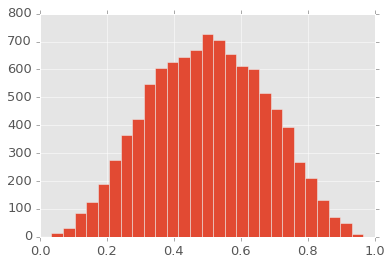

In [117]:
scale = 1
shift = 0
n_samples = 10000
lam = 5
res = sample_beta(scale,shift,lam,n_samples)
bins = sp.linspace(0,1,30)*scale + shift
pl.hist(res,bins = bins);

In [29]:
n_particles = 1000
scale = [400,200,25,20]
shift = [600,100,15,10]
start = global_smc_abc_start(Data,Mock,n_particles,selected_particles,scale,shift)

Only off time as local variable
Simulated  1 / 4
Simulated  2 / 4
Simulated  3 / 4
Simulated  4 / 4
Simulations: DONE
Distance: DONE
Min start distance: 3.719
Mean start distance: 4.834
Max start distance: 9.504
STD of start distance: 0.555
Duration 19.81 min


In [40]:
np.save(path+'global/start_global_T_constrained_1000.npy',start)

In [ ]:
start